### Problem Statement:

It is the year 2022 and we are at the verge of a massive climatic
change. With global warming at its peak and fossil fuels inching towards
its extinction, it is the need of the hour to step up and take
responsibility for our planet. Developing countries all over the world
are making a shift towards a cleaner energy source and are looking at
ways to expand their global energy source power.

Switching to renewable energy sources is a great way to reduce
dependency on imported fuels and increase cost efficiency. It is time we
move towards a low-carbon future by embracing solar, hydro, geothermal
energy and so on, to protect mother nature.

An efficient energy source that has been gaining popularity around the
world is wind turbines. Wind turbines generate power by capturing the
kinetic energy of the wind. Factors such as temperature, wind direction,
turbine status, weather, blade length, and so on influence the amount of
power generated.

<https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/>

### Objective:

The objective is to build a sophisticated Machine Learning model that
predicts the power that is generated (in KW/h) based on the various
features provided in the dataset. To analyze and implement multiple
algorithms and determine which is more appropriate for a problem To get
hands-on experience in Machine Learning problems.

### Problem solving approach:

1.  Splitting the data into train and test in 80:20 ratio.

2.  Questioning the data - Understanding the variables very carefully
    and formulating questions/hypothesis. (Note : These are just initial
    hypothesis which may or may not seem to be true after the EDA step.)

3.  EDA - Exploring the dataset very carefully by doing univariate
    analysis and bivariate analysis by choosing appropriate graphs,
    charts and descriptive measures. Reporting the surprising elements
    (i.e. the one which were believed would be true in step 1 did not
    turn out to be true, or a result that was beyond expectation, etc.)

4.  Missing value imputation using various methods such as mean,median
    or KNN imputation.

5.  Feature engineering - (A) Suggesting some possible feature
    transformations (like log(X), sqrt(X), X^2, X1\*X2, etc.) with
    reasons. (B) Suggesting some new feature generation techniques
    (e.g.: creating dummy variables, or using one-hot encoding, or
    transforming an existing feature to a new feature).

### Attribute Information :

| Column Name                    | Meaning                                                                                             |
|:---------|:-------------------------------------------------------------------------------------|
| tracking_id                    | ID of the Wind Turbine                                                                              |
| datetime                       | Date and Time                                                                                       |
| wind_speed(m/s)                | Speed of wind in m/s                                                                                |     
| atmospheric_temperature(°C)    | Represents the temperature (in degree Celcius) of a town or village that the windmill is present in |     
| shaft_temperature(°C)          | Wind Mill shaft temperature in degree Celcius                                                       |     
| blades_angle(°)                | Angle of blades in degree                                                                           |     
| gearbox_temperature(°C)        | Gear box temperature in degree Celcius                                                              |     
| engine_temperature(°C)         | Engine temperature in degree Celcius                                                                |     
| motor_torque(N-m)              | Torque of Motor in N.m                                                                              |     
| generator_temperature(°C)      | Generator temperature in degree Celcius                                                             |     
| atmospheric_pressure(Pascal)   | Atmospheric Pressure in Pascal                                                                      |     
| area_temperature(°C)           | Represents the temperature (in degree Celcius) of the area within a 100 m radius of the windmill    |     
| windmill_body_temperature(°C)  | Wind Mill body temperature in degree Celcius                                                        |     
| wind_direction(°)              | Wind direction in degree                                                                            |     
| resistance(ohm)                | Winding resistance in Ohm                                                                           |     
| rotor_torque(N-m)              | Rotor torque in N.m                                                                                 |     
| turbine_status                 | Turbine Status(AAA, A2, AB, AC, A, ABC, BBB, BA, BB, B2, BCB, BD, B, D)                             |     
| cloud_level                    | Cloud Level (Extremely Low, Low, Medium)                                                            |     
| blade_length(m)                | Length of blades in m                                                                               |     
| blade_breadth(m)               | Breadth of blades in m                                                                              |     
| windmill_height(m)             | Height of Wind mill in m                                                                            |     
| windmill_generated_power(kW/h) | Power generated by wind mill in kW/h                                                                |     

- The below code to be used for converting ipynb file to a R-markdown file. This is needed because knn imputation required VIM library of R which is not able to install in jupyter notebook environment.
## rmarkdown::convert_ipynb("Windmill_Power_Prediction_EDA.ipynb", "ABCD.Rmd")

Initial Hypotheses without doing EDA (Answers are written in () after
EDA):

1.  wind_speed and windmill_generated_power are strongly positively
    correlated (Wrong!, r=0.06)

2.  rotor_torque and generator_temperature are positively correlated
    (True, r = 0.375)

3.  windmill_generated_power and blade_length are positively correlated
    (Wrong, r=0.013)

4.  windmill_height and blade_length are positively correlated (Wrong,
    r=0.016)

5.  atmospheric_temperature and area_temperature are positively
    correlated (Wrong, r=0.07)

6.  resistance and windmill_generated_power are negatively correlated
    (Wrong, r=0.234)

7.  For different turbine_status, distribution of
    windmill_generated_power will be different (Wrong, concluded from
    side by side boxplots)

8.  engine_temperature is positively correlated with gearbox_temperature
    (True but very weak correlation, r=0.134)

9.  motor_torque and rotor_torque are positively correlated (True,
    r=0.392)

10. blades_angle and wind_direction are positively correlated (Wrong,
    r=-0.024)

    r = correlation coefficient.

## 3. Univariate analysis

In [1]:
# loading the dataset
url = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Wind_Mill_Power_Prediction.csv"
df <- read.csv(url)
dim(df) # checking dimensions of the dataset

[1] 28200    22

In [2]:
names(df) #column names of the dataset

[1] "tracking_id"                    "datetime"                      
 [3] "wind_speed.m.s."                "atmospheric_temperature.Â.C."  
 [5] "shaft_temperature.Â.C."         "blades_angle.Â.."              
 [7] "gearbox_temperature.Â.C."       "engine_temperature.Â.C."       
 [9] "motor_torque.N.m."              "generator_temperature.Â.C."    
[11] "atmospheric_pressure.Pascal."   "area_temperature.Â.C."         
[13] "windmill_body_temperature.Â.C." "wind_direction.Â.."            
[15] "resistance.ohm."                "rotor_torque.N.m."             
[17] "turbine_status"                 "cloud_level"                   
[19] "blade_length.m."                "blade_breadth.m."              
[21] "windmill_height.m."             "windmill_generated_power.kW.h."

In [3]:
getwd() #checking working directory

[1] "c:/Users/kanda/OneDrive/Documents/Praxis/Term-2/AML/Regression/EDA Final"

In [4]:
#checking how many rows have all no null values in all columns.
sum(complete.cases(df))

[1] 12850

In [5]:
#checking how many missing values are present in our target variable.
sum(is.na(df$windmill_generated_power.kW.h.))

[1] 207

In [6]:
#checking how many values are present in our target variable which are not null.
sum(complete.cases(df$windmill_generated_power.kW.h.))

[1] 27993

In [7]:
# We are dropping the rows which have null values in the target variable column and creating a different dataframe
df2 = df[complete.cases(df$windmill_generated_power.kW.h.),]

In [8]:
# Checkig dimensions of dataframe
dim(df2)

[1] 27993    22

In [9]:
# Checking first 5 rows of the data frame
head(df2, 5)

tracking_id,datetime,wind_speed.m.s.,atmospheric_temperature.Â.C.,shaft_temperature.Â.C.,blades_angle.Â..,gearbox_temperature.Â.C.,engine_temperature.Â.C.,motor_torque.N.m.,generator_temperature.Â.C.,...,windmill_body_temperature.Â.C.,wind_direction.Â..,resistance.ohm.,rotor_torque.N.m.,turbine_status,cloud_level,blade_length.m.,blade_breadth.m.,windmill_height.m.,windmill_generated_power.kW.h.
WM_33725,2019-08-04 14:33:20,94.82002,-99.00000,41.72302,-0.9034229,82.41057,42.52302,2563.1245,76.66556,...,NA,239.8364,2730.311,42.08467,BA,Medium,2.217542,0.3140648,24.28169,6.766521
WM_698,2018-11-05 10:13:20,241.83273,27.76478,-99.00000,-99.0000000,44.10492,46.25887,2372.3841,78.12980,...,NA,337.9447,1780.207,107.88864,A2,Medium,4.210346,0.4484944,27.26214,5.966275
WM_39146,2019-09-14 14:03:20,95.48472,NA,41.85547,12.6527635,42.32210,42.87855,1657.1696,67.65447,...,45.03320,227.8503,1666.050,-42.93146,ABC,Medium,2.719475,0.3023210,27.36613,2.874342
WM_6757,2018-12-25 15:33:20,238.81942,-99.00000,45.44391,15.1153228,44.75964,47.28210,2888.1341,95.38997,...,44.82715,492.0815,1964.503,42.74460,ABC,,4.857385,0.3671399,24.28777,14.851089
WM_21521,2019-05-04 03:13:20,10.72289,NA,41.98118,1.7156961,-17.61646,43.46985,781.6954,37.42307,...,-99.00000,259.2746,1177.516,13.38729,AAA,Medium,NA,0.4533737,27.97165,3.519074


In [10]:
# Confirming whether missing values are present in target variable or not
sum(is.na(df2$windmill_generated_power.kW.h.))

[1] 0

In [11]:
# Randomly shuffling the dataframe rows
set.seed(0) #setting a seed value for reproducibility
random_df = df2[sample(1:nrow(df2)), ]

In [12]:
#Changing column names to remove unwanted special characters and white spaces from the current column names
colnames(random_df) <- c('tracking_id', 'datetime','speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'turbine_status', 'cloud_level',
       'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power')
names(random_df)

[1] "tracking_id"               "datetime"                 
 [3] "speed_wind"                "atmospheric_temperature"  
 [5] "shaft_temperature"         "blades_angle"             
 [7] "gearbox_temperature"       "engine_temperature"       
 [9] "motor_torque"              "generator_temperature"    
[11] "atmospheric_pressure"      "area_temperature"         
[13] "body_temperature_windmill" "direction_wind"           
[15] "resistance"                "rotor_torque"             
[17] "turbine_status"            "cloud_level"              
[19] "blade_length"              "blade_breadth"            
[21] "height_windmill"           "windmill_generated_power"

In [13]:
# Reviewing the dataframe with changed column names
head(random_df,6)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,body_temperature_windmill,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power
26192,WM_24537,2019-05-25 12:53:20,17.72478,NA,-7.188719,0.1414163,40.254733,42.43052,822.4819,38.47305,...,42.70092,218.2293,1246.371,13.20723,AB,Low,8.300782,0.3814347,26.53865,5.327000
17516,WM_11995,2019-02-02 12:53:20,96.82917,17.55623,43.230546,14.3595777,49.450861,43.94813,2839.8185,92.68765,...,46.51208,313.8371,1953.055,47.48195,BB,Medium,3.935231,0.4718723,24.94531,13.769339
24567,WM_23214,2019-05-16 03:43:20,-136.21533,12.22514,41.908392,-99.0000000,41.283494,42.78060,783.3366,38.38925,...,42.15207,211.4183,1213.762,75.87272,BA,Medium,3.634979,0.4235379,27.17957,4.653317
4803,WM_2835,2018-11-24 16:33:20,96.77077,29.38938,46.760040,-1.3033806,-23.077281,45.44861,2462.8923,75.78548,...,46.44784,281.9405,1793.424,39.87404,A,Low,NA,0.4724430,24.51290,6.242050
26949,WM_38441,2019-09-09 04:13:20,19.90549,11.66558,45.029645,-146.2595427,43.095891,42.98405,820.0955,40.22810,...,41.74974,265.4704,1249.299,13.93055,AC,Low,3.113394,0.4779521,30.70911,5.640274
13306,WM_22406,2019-05-10 08:43:20,431.20274,-99.00000,43.007841,70.4918064,-8.789233,40.64892,2121.9445,67.32433,...,-99.00000,235.5045,1682.971,34.52433,B2,Medium,3.566594,0.4289816,36.41731,3.538150


In [14]:
smp_size <- floor(0.80 * nrow(random_df)) #returns the highest integer values which is smaller than the input value

In [15]:
# Reviewing the dataframe with changed column names
head(random_df,6)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,body_temperature_windmill,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power
26192,WM_24537,2019-05-25 12:53:20,17.72478,NA,-7.188719,0.1414163,40.254733,42.43052,822.4819,38.47305,...,42.70092,218.2293,1246.371,13.20723,AB,Low,8.300782,0.3814347,26.53865,5.327000
17516,WM_11995,2019-02-02 12:53:20,96.82917,17.55623,43.230546,14.3595777,49.450861,43.94813,2839.8185,92.68765,...,46.51208,313.8371,1953.055,47.48195,BB,Medium,3.935231,0.4718723,24.94531,13.769339
24567,WM_23214,2019-05-16 03:43:20,-136.21533,12.22514,41.908392,-99.0000000,41.283494,42.78060,783.3366,38.38925,...,42.15207,211.4183,1213.762,75.87272,BA,Medium,3.634979,0.4235379,27.17957,4.653317
4803,WM_2835,2018-11-24 16:33:20,96.77077,29.38938,46.760040,-1.3033806,-23.077281,45.44861,2462.8923,75.78548,...,46.44784,281.9405,1793.424,39.87404,A,Low,NA,0.4724430,24.51290,6.242050
26949,WM_38441,2019-09-09 04:13:20,19.90549,11.66558,45.029645,-146.2595427,43.095891,42.98405,820.0955,40.22810,...,41.74974,265.4704,1249.299,13.93055,AC,Low,3.113394,0.4779521,30.70911,5.640274
13306,WM_22406,2019-05-10 08:43:20,431.20274,-99.00000,43.007841,70.4918064,-8.789233,40.64892,2121.9445,67.32433,...,-99.00000,235.5045,1682.971,34.52433,B2,Medium,3.566594,0.4289816,36.41731,3.538150


In [16]:
smp_size <- floor(0.80 * nrow(random_df)) #returns the highest integer values which is smaller than the input value

## splitting dataset into train and test data
train <- random_df[c(1:smp_size), ]
test <- random_df[-c(1:smp_size), ]

In [17]:
head(train,2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,body_temperature_windmill,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power
26192,WM_24537,2019-05-25 12:53:20,17.72478,NA,-7.188719,0.1414163,40.25473,42.43052,822.4819,38.47305,...,42.70092,218.2293,1246.371,13.20723,AB,Low,8.300782,0.3814347,26.53865,5.32700
17516,WM_11995,2019-02-02 12:53:20,96.82917,17.55623,43.230546,14.3595777,49.45086,43.94813,2839.8185,92.68765,...,46.51208,313.8371,1953.055,47.48195,BB,Medium,3.935231,0.4718723,24.94531,13.76934


In [18]:
head(test,2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,body_temperature_windmill,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power
12505,WM_51,2018-10-29 05:33:20,96.38635,NA,14.115891,5.9524362,-69.51770,43.44783,2859.880,86.73687,...,-99,512.6635,1976.228,104.68619,D,Medium,1.216556,0.4913661,25.36104,9.29106
7967,WM_1441,2018-11-11 08:53:20,95.26949,25.83413,5.089377,0.7867103,42.01369,41.11506,2040.684,70.16148,...,-99,NA,1698.318,32.66445,BA,Medium,NA,0.3577590,26.54572,3.96375


In [19]:
#Checking dimensions of the dataframes
dim(train)
dim(test)
dim(train)[1] + dim(test)[1]

[1] 22394    22

[1] 5599   22

[1] 27993

In [20]:
# copying training dataset in a dataframe
df_train <- train
# Copying test dataset in a dataframe
df_test <- test

In [21]:
# Displaying column names
cols <- c(names(df_train))
cols

[1] "tracking_id"               "datetime"                 
 [3] "speed_wind"                "atmospheric_temperature"  
 [5] "shaft_temperature"         "blades_angle"             
 [7] "gearbox_temperature"       "engine_temperature"       
 [9] "motor_torque"              "generator_temperature"    
[11] "atmospheric_pressure"      "area_temperature"         
[13] "body_temperature_windmill" "direction_wind"           
[15] "resistance"                "rotor_torque"             
[17] "turbine_status"            "cloud_level"              
[19] "blade_length"              "blade_breadth"            
[21] "height_windmill"           "windmill_generated_power"

In [22]:
round(cor(df_train[,c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22)], use = "complete.obs"),3) #correlation matrix

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000,0.060,0.035,0.002,0.017,0.154,0.380,0.433,-0.130,0.211,0.025,0.047,0.227,0.149,-0.012,0.009,-0.011,0.063
atmospheric_temperature,0.060,1.000,0.020,0.008,-0.012,0.054,0.086,0.112,-0.026,0.076,-0.002,0.010,0.050,0.044,0.014,0.002,-0.007,-0.002
shaft_temperature,0.035,0.020,1.000,-0.027,0.038,0.217,0.074,0.078,-0.028,0.083,0.029,0.031,0.043,0.033,0.017,0.000,-0.020,0.041
blades_angle,0.002,0.008,-0.027,1.000,-0.033,-0.063,-0.148,-0.037,-0.001,-0.072,-0.007,-0.043,-0.029,-0.054,-0.022,-0.072,-0.004,-0.169
gearbox_temperature,0.017,-0.012,0.038,-0.033,1.000,0.155,0.055,0.054,-0.003,0.058,0.018,0.027,0.029,0.023,-0.010,0.009,0.014,0.064
engine_temperature,0.154,0.054,0.217,-0.063,0.155,1.000,0.356,0.366,-0.071,0.325,0.095,0.135,0.201,0.145,-0.011,0.016,-0.016,0.244
motor_torque,0.380,0.086,0.074,-0.148,0.055,0.356,1.000,0.927,-0.223,0.475,0.031,0.214,0.488,0.399,0.004,0.068,-0.008,0.517
generator_temperature,0.433,0.112,0.078,-0.037,0.054,0.366,0.927,1.000,-0.249,0.525,0.037,0.206,0.520,0.378,0.001,0.022,-0.009,0.383
atmospheric_pressure,-0.130,-0.026,-0.028,-0.001,-0.003,-0.071,-0.223,-0.249,1.000,-0.093,-0.015,-0.023,-0.134,-0.100,-0.001,-0.007,0.011,-0.018
area_temperature,0.211,0.076,0.083,-0.072,0.058,0.325,0.475,0.525,-0.093,1.000,0.054,0.192,0.254,0.193,0.000,0.034,-0.015,0.346


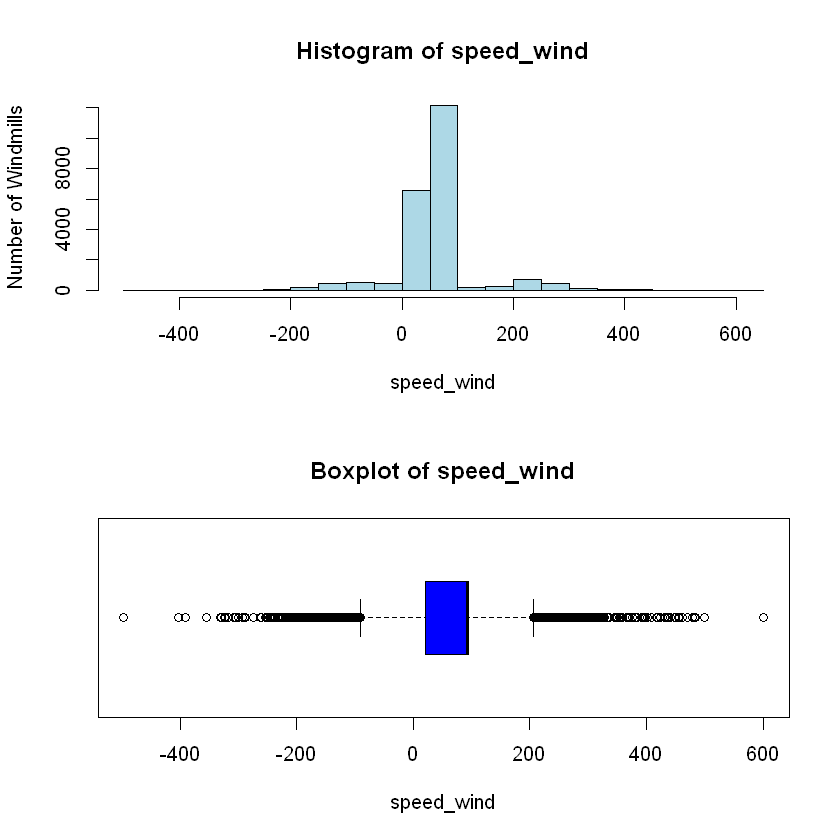

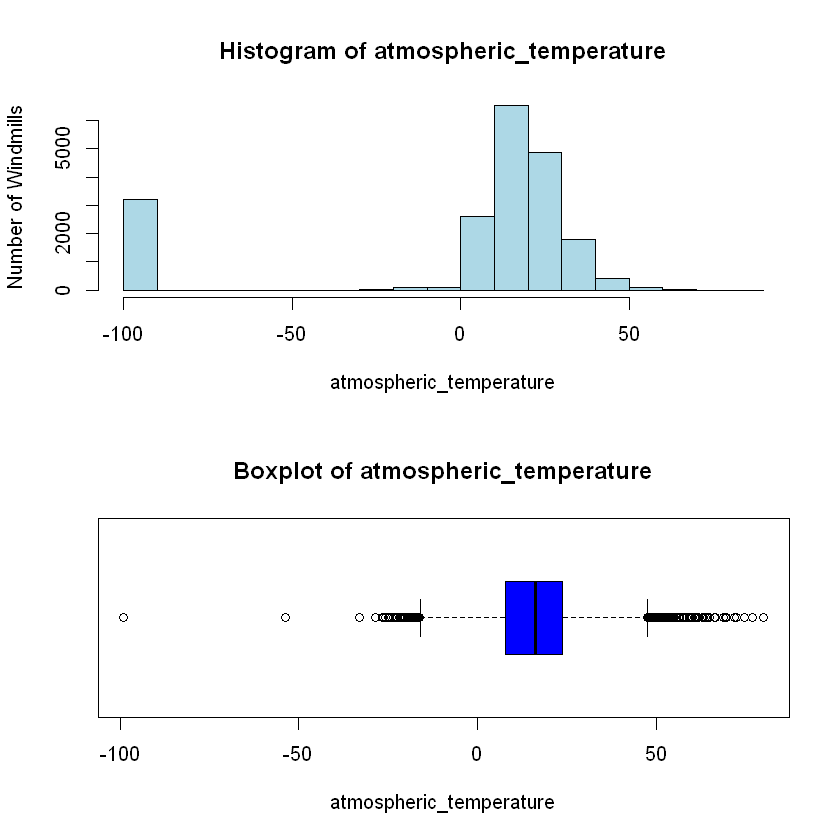

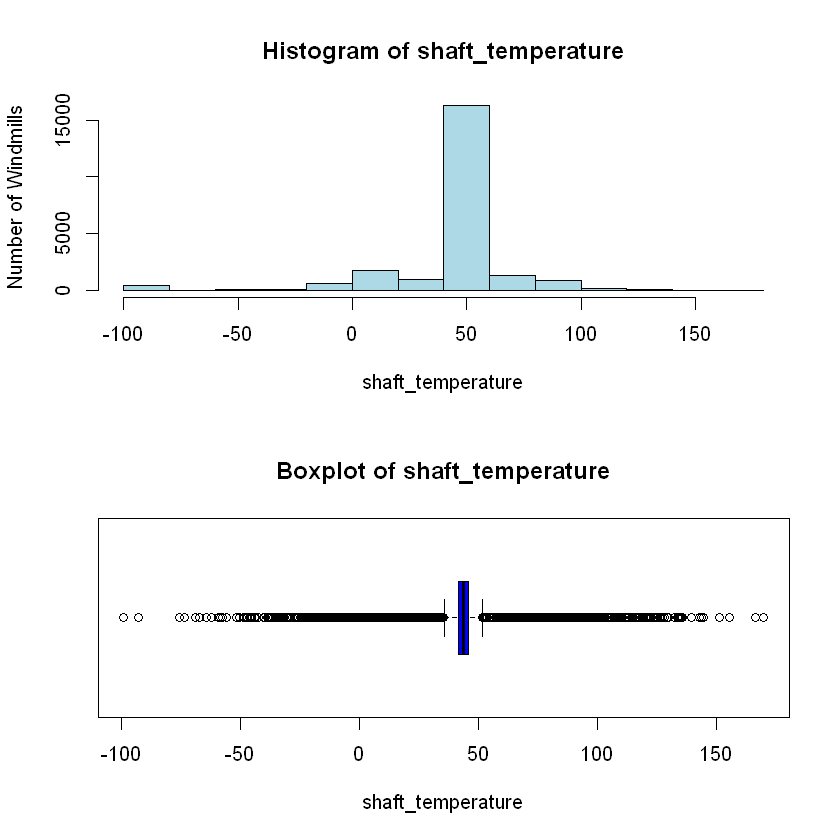

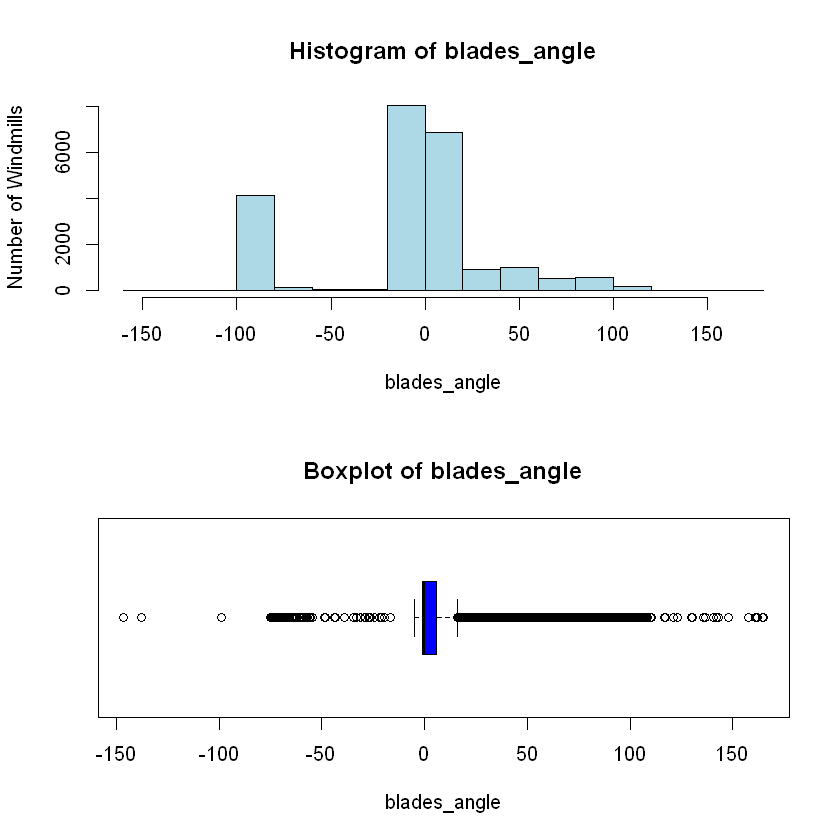

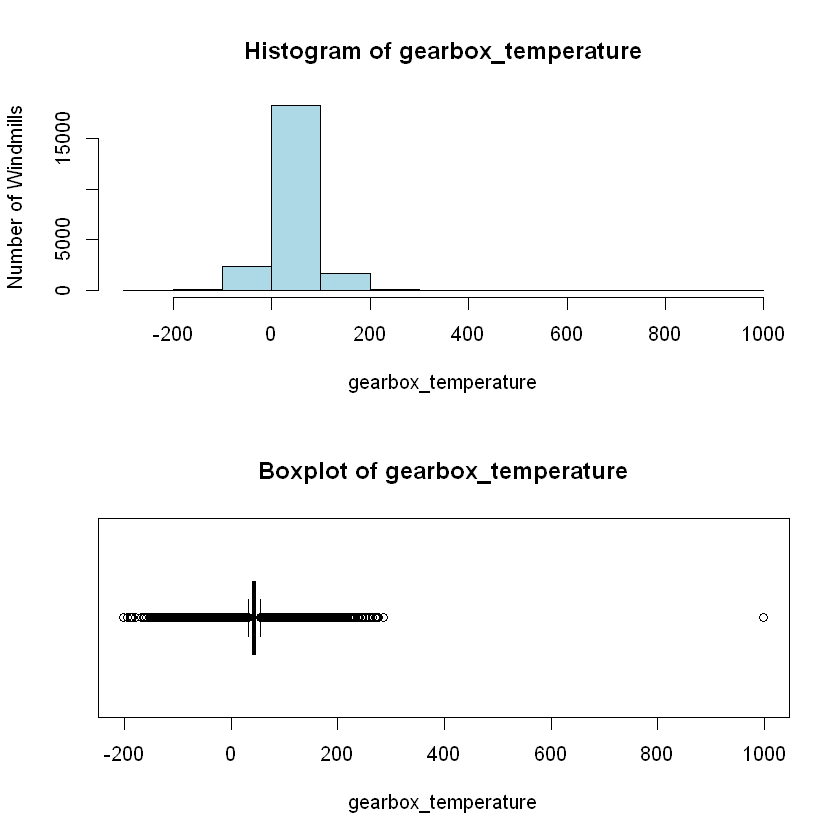

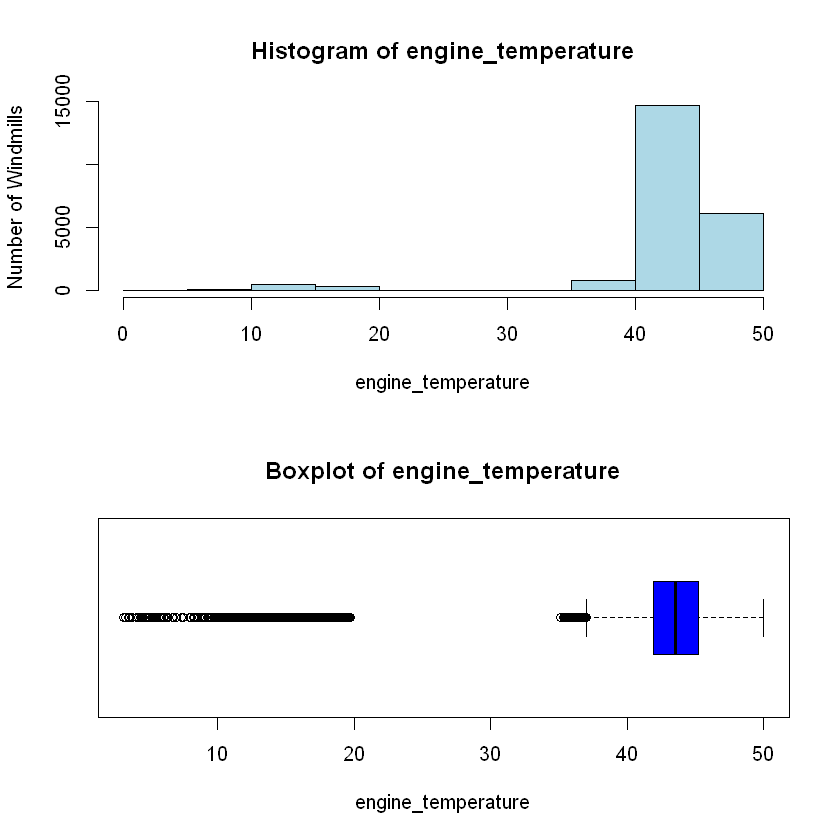

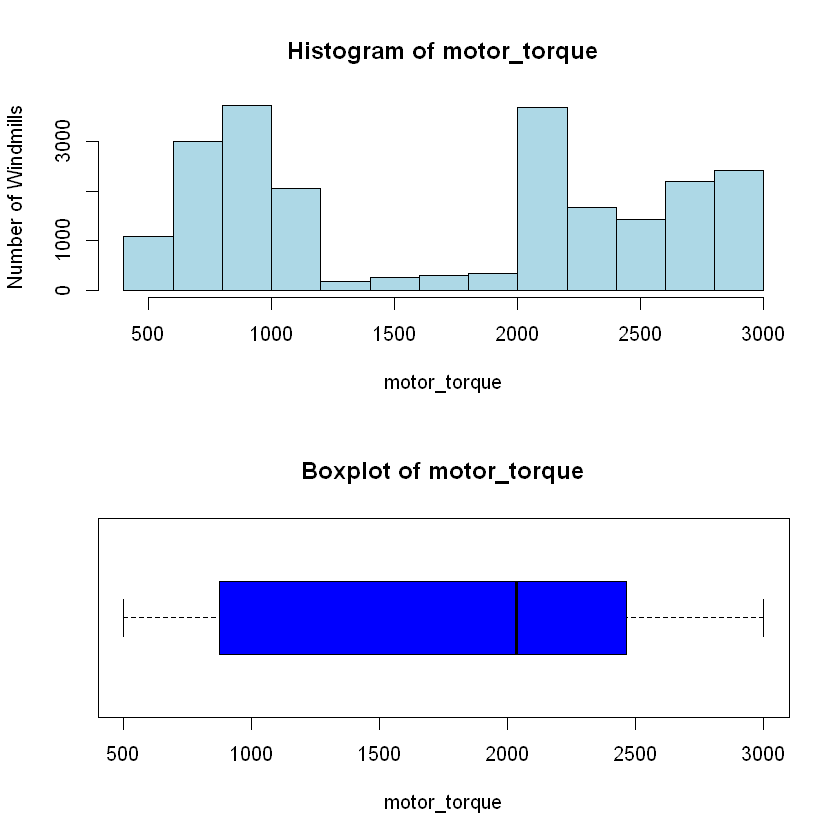

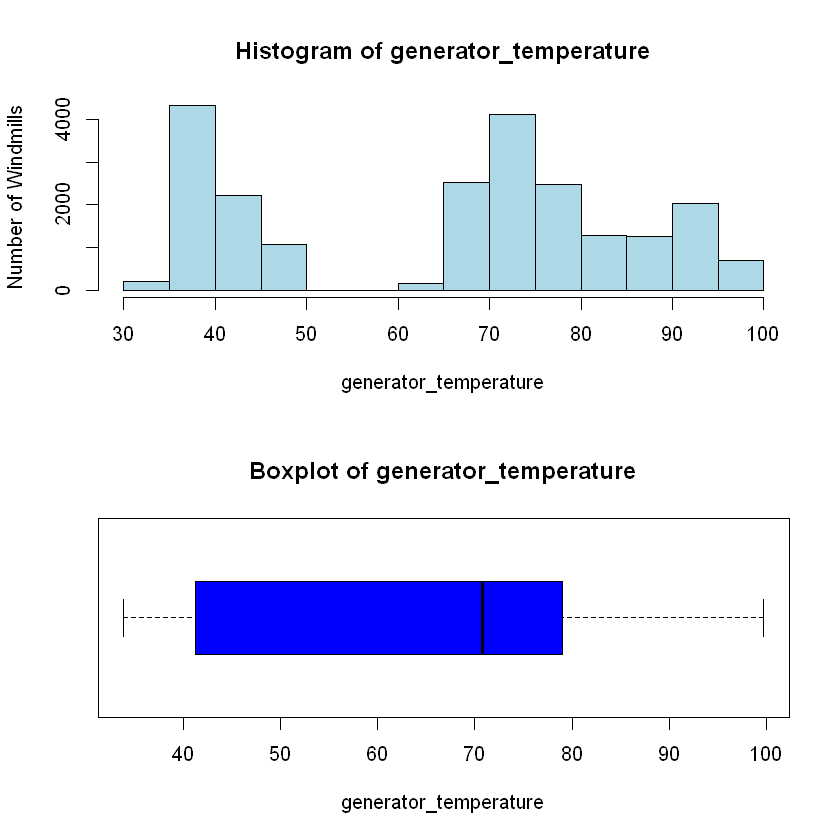

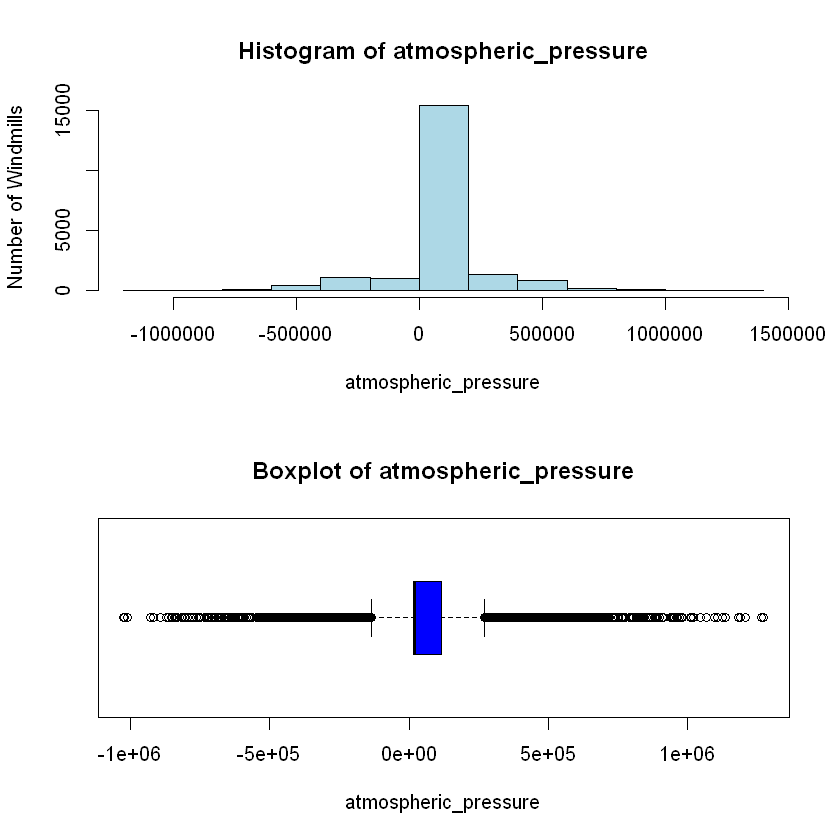

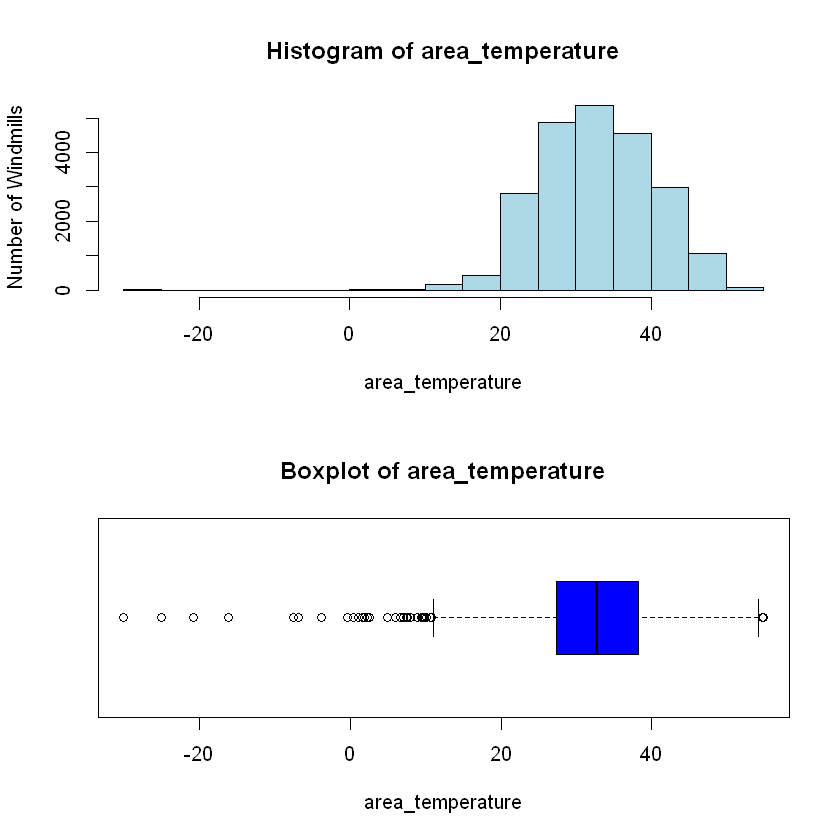

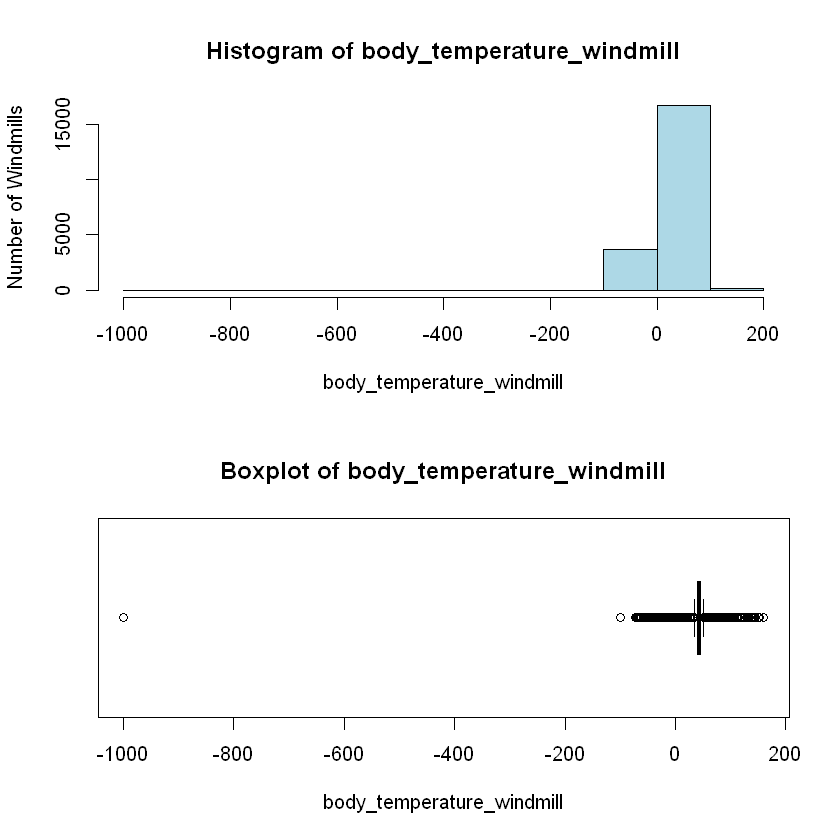

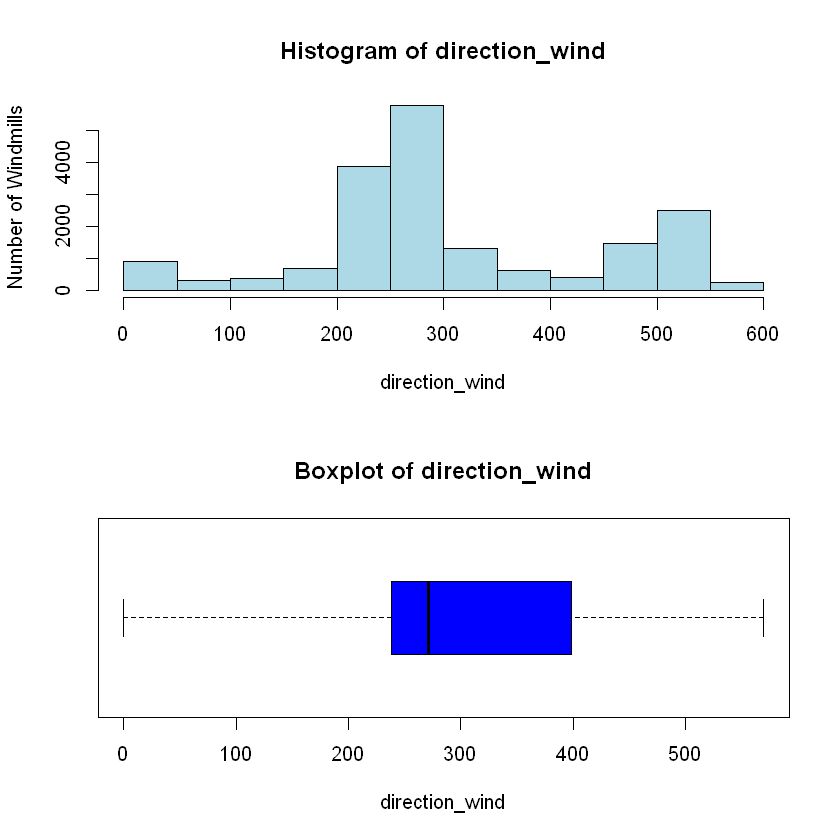

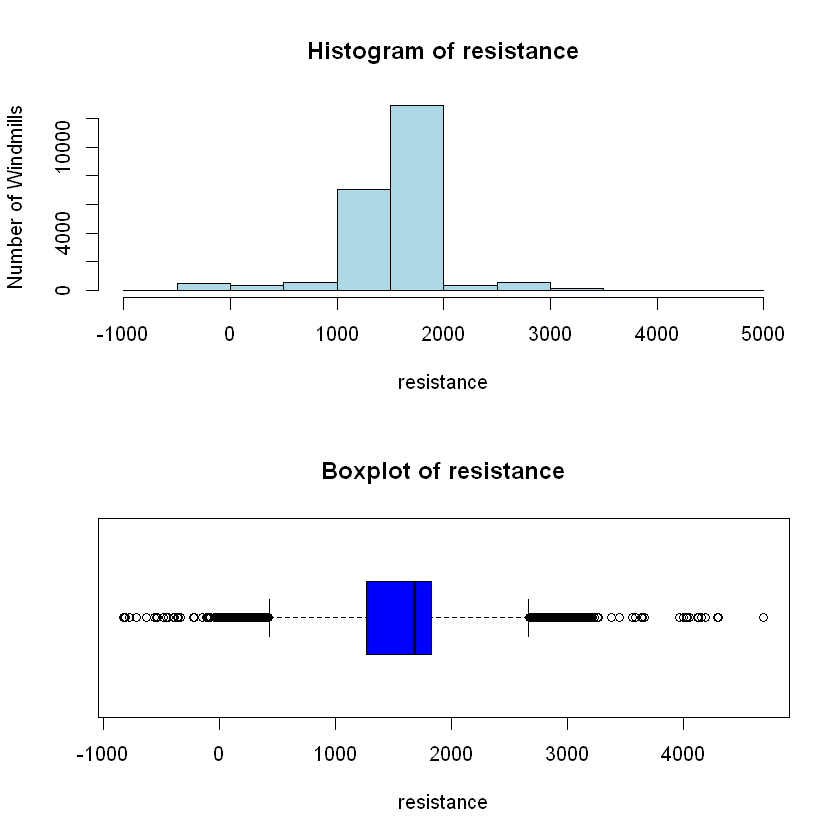

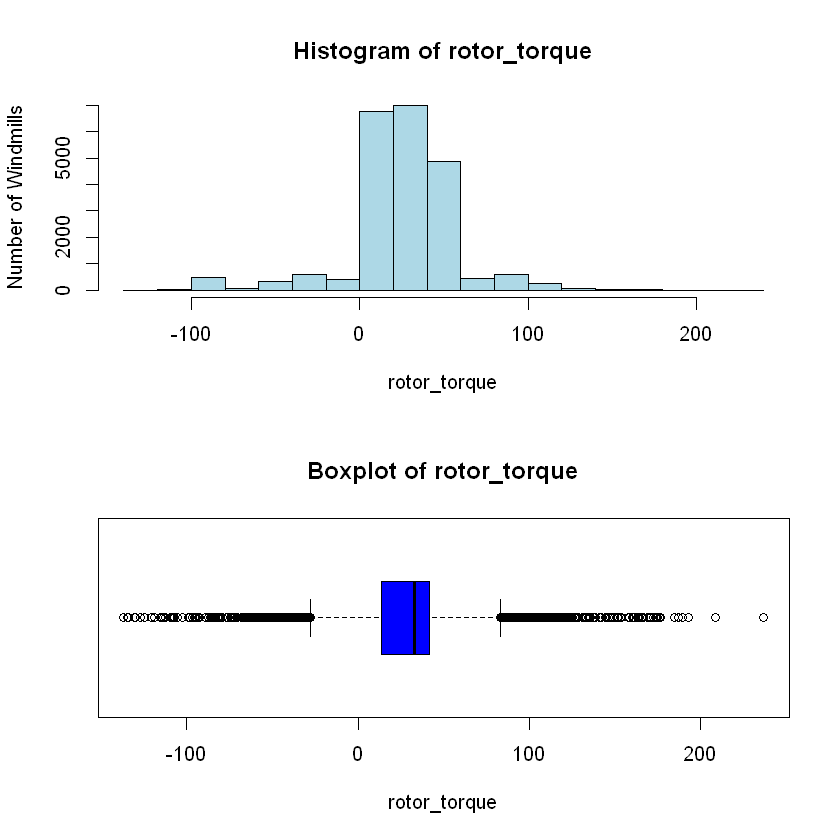

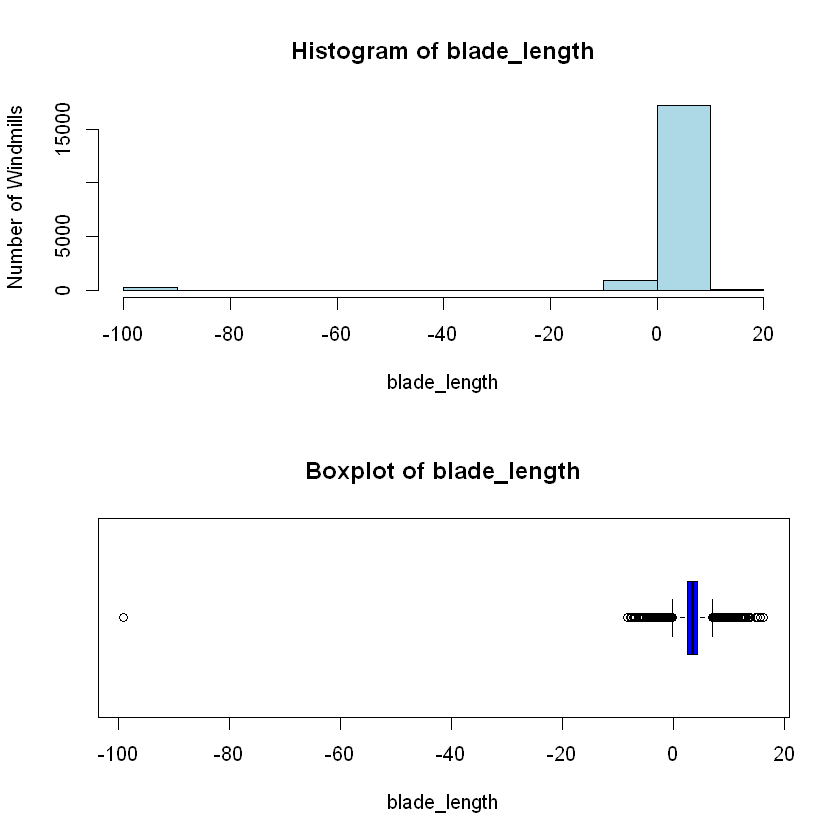

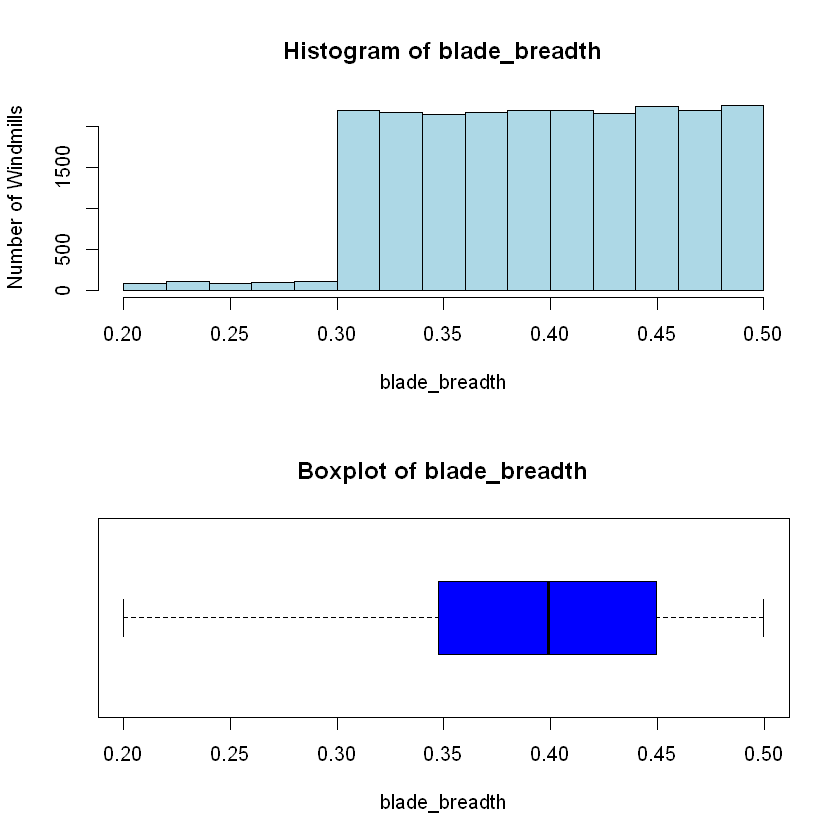

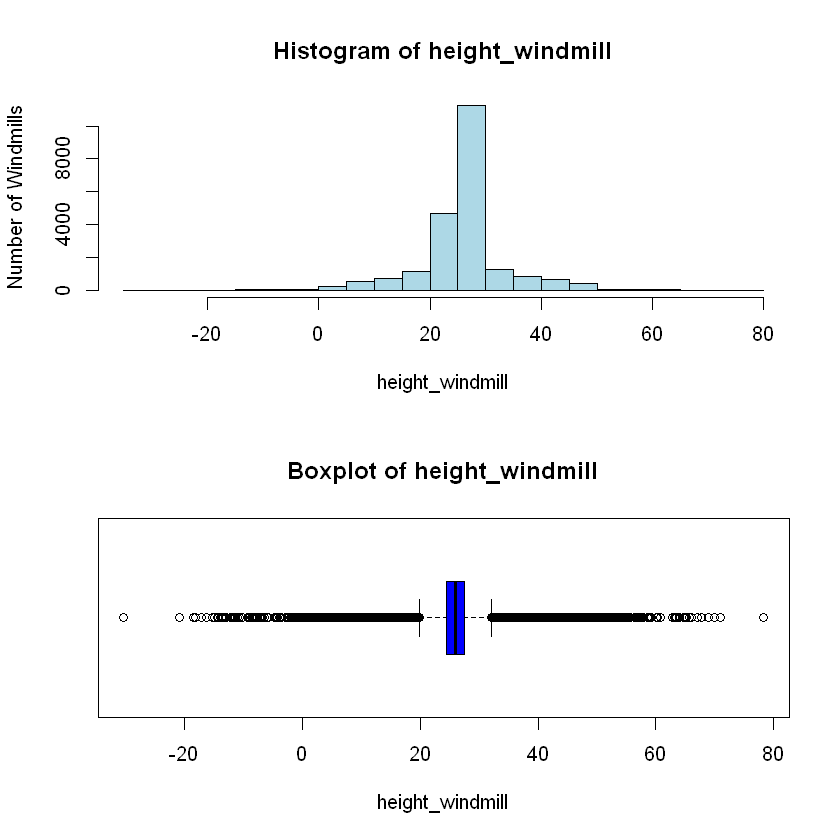

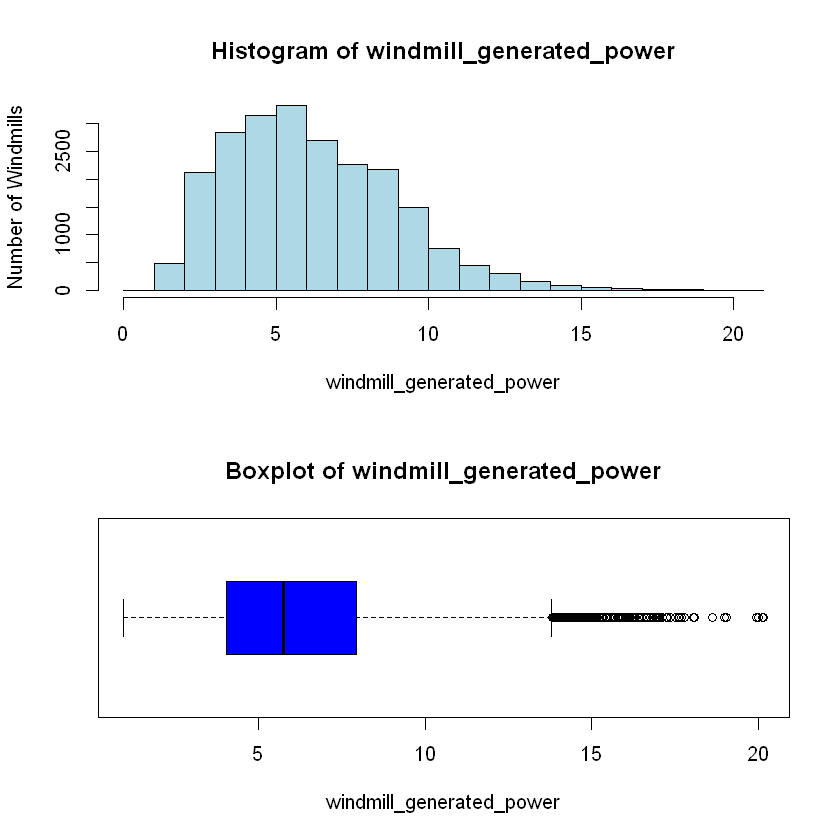

In [23]:
# Plotting histogram and box plot for numerical features
for (i in names(df_train[,c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22)])) 
  {
    par(mfrow = c(2, 1)) #partitioning plotting area into two parts such that box plot is below histogram.
    hist(df_train[,i],
         xlab = i,
         ylab = "Number of Windmills",
         main = paste("Histogram of", i, sep =" ") ,
         col = "lightblue",
         border = "black")
    
    boxplot(df_train[,i],
        xlab = i, horizontal = T,
        main = paste("Boxplot of", i, sep =" "),
        col = "blue",
        border = "black")
  }

-   Target variable windmill_generated_power has right skewed
    distribution.
-   Resistance is having negative values which is not practical, we will
    convert them to positive values.
-   Area_temperature is having left skewed distribution
-   Wind_speed is having very high values and also in negative, as we
    have wind_direction variable we will convert Wind_speed to an
    absolute values.
-   Atmospheric_temperature is having alot of values near -100, this
    could be an error in observation or null values could have been
    represented by this value because lowest temperature ever recorded
    on the surface of the Earth is -89.2°C since 1912. Similar case is
    there for shaft_temperature and windmill_body_temperature as well.
-   Atmospheric_pressure is having negative values, which is practically
    not possible, so we will need to treat these before further
    analysis.
-   Gearbox_temperature are very extreme on the negative side, we might
    need to treat them before further analysis.
-   Wind_speed variable is having unit m/s and by this unit, it’s
    highest value of approx 600m/s corrosponds to 2160 km/h, which is
    extremely high and is much higher than even the speed of class 5
    hurricane(\>70m/s). So we will scale these values down to get
    practical values.

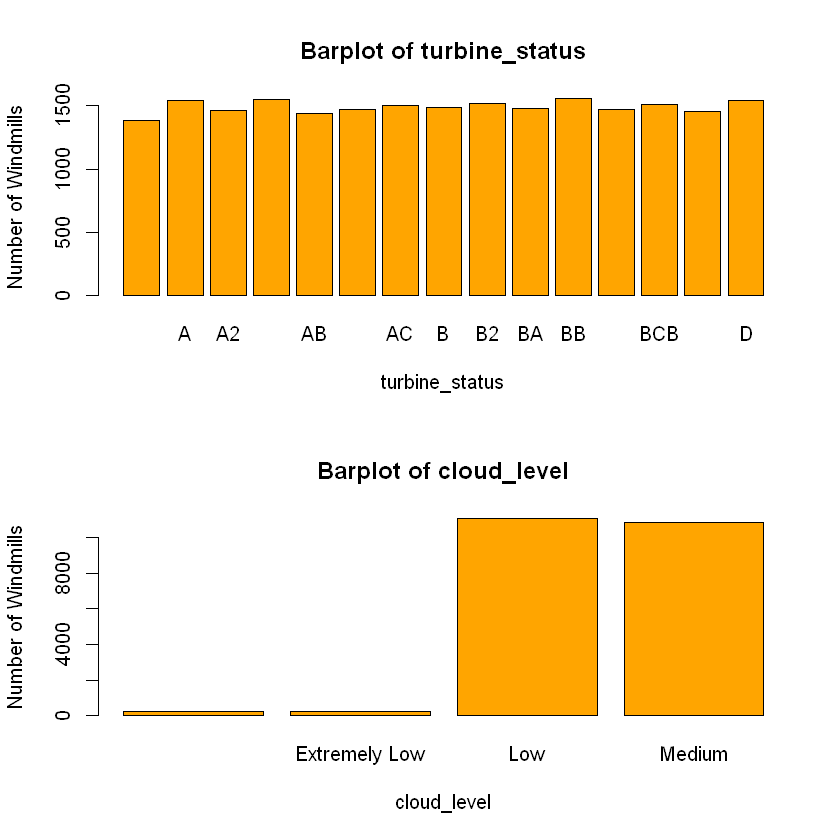

In [24]:
# Plotting bar plot for categorical features
par(mfrow = c(2, 1))
for (i in names(df_train[,c(17,18)])) 
  {
    barplot(table(df_train[,i]),col = "orange", 
            xlab = i,
            ylab = "Number of Windmills",
            main = paste("Barplot of", i, sep =" ") ,)
  }

-   For all turbine status values almost same values of observations are
    there.
-   There are very few number of observations available for extremely
    low cloud level.

In [25]:
#checking distribution summary of all variables
summary(df_train)

   tracking_id                   datetime       speed_wind     
 WM_1    :    1   2018-10-28 20:53:20:    1   Min.   :-496.21  
 WM_10   :    1   2018-10-28 21:03:20:    1   1st Qu.:  21.13  
 WM_1000 :    1   2018-10-28 21:33:20:    1   Median :  93.31  
 WM_10000:    1   2018-10-28 21:53:20:    1   Mean   :  69.36  
 WM_10001:    1   2018-10-28 22:23:20:    1   3rd Qu.:  95.29  
 WM_10002:    1   2018-10-28 23:03:20:    1   Max.   : 601.46  
 (Other) :22388   (Other)            :22388   NA's   :209      
 atmospheric_temperature shaft_temperature  blades_angle      
 Min.   :-99.0000        Min.   :-99.00    Min.   :-146.2595  
 1st Qu.:  7.7688        1st Qu.: 41.65    1st Qu.:  -1.1974  
 Median : 16.1421        Median : 43.68    Median :  -0.4883  
 Mean   :  0.0374        Mean   : 40.21    Mean   :  -9.5606  
 3rd Qu.: 23.6833        3rd Qu.: 45.69    3rd Qu.:   5.6891  
 Max.   : 80.2174        Max.   :169.82    Max.   : 165.1694  
 NA's   :2712            NA's   :1         NA's

In [26]:
nrow(df_train[(df_train$atmospheric_temperature == -999), ])

[1] 2712

In [27]:
sum(is.na(df_train$atmospheric_temperature))

[1] 2712

Even though, the minimum temperature of atmospheric_temperature column
is -99, when we check number of rows containing -999 value in
atmospheric_temperature column, the output is showing 2712, which is the
exact number of missing values in that column. so to identify number of
rows containing -99 value in atmospheric_temperature, we need to
subtract missing values from the output we obtain.

In [28]:
nrow(df_train[(df_train$atmospheric_temperature == -99), ]) - sum(is.na(df_train$atmospheric_temperature))

[1] 3194

Warning message in bxp(list(stats = structure(c(-77.3109300109521, 23.9433397429835, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"Warning message in bxp(list(stats = structure(c(-91.5131046705393, 19.4664154181873, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

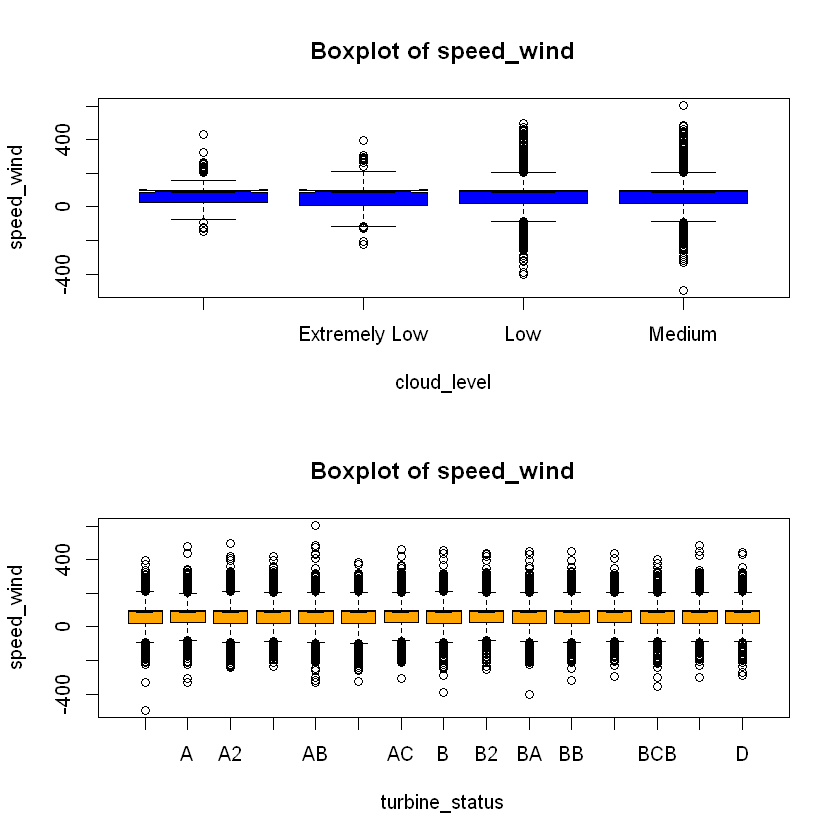

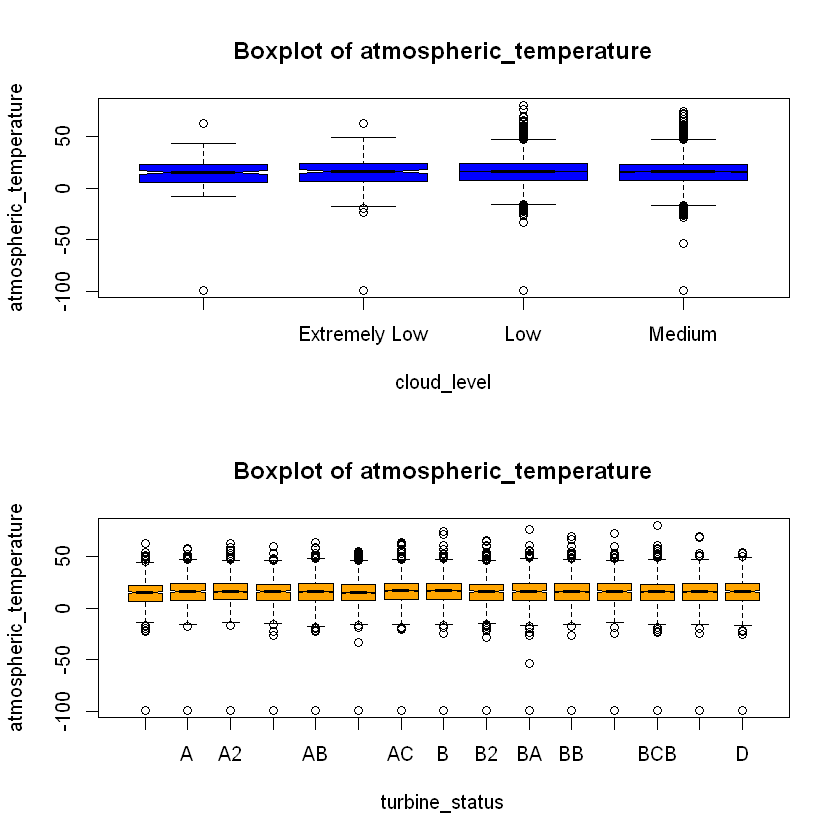

Warning message in bxp(list(stats = structure(c(-1.39289518647763, -1.20761206543162, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

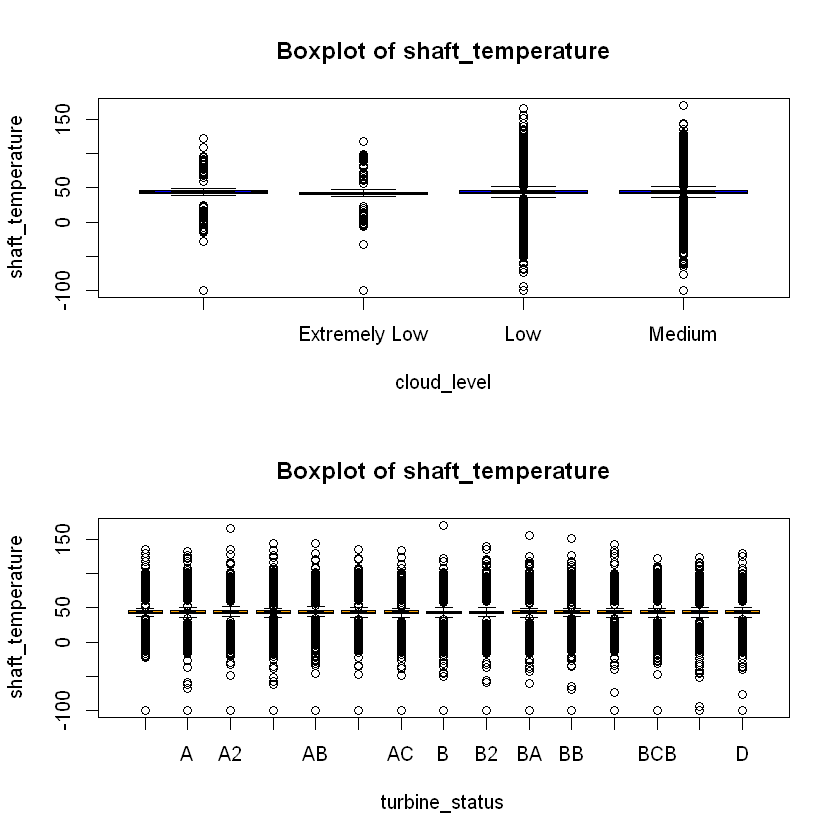

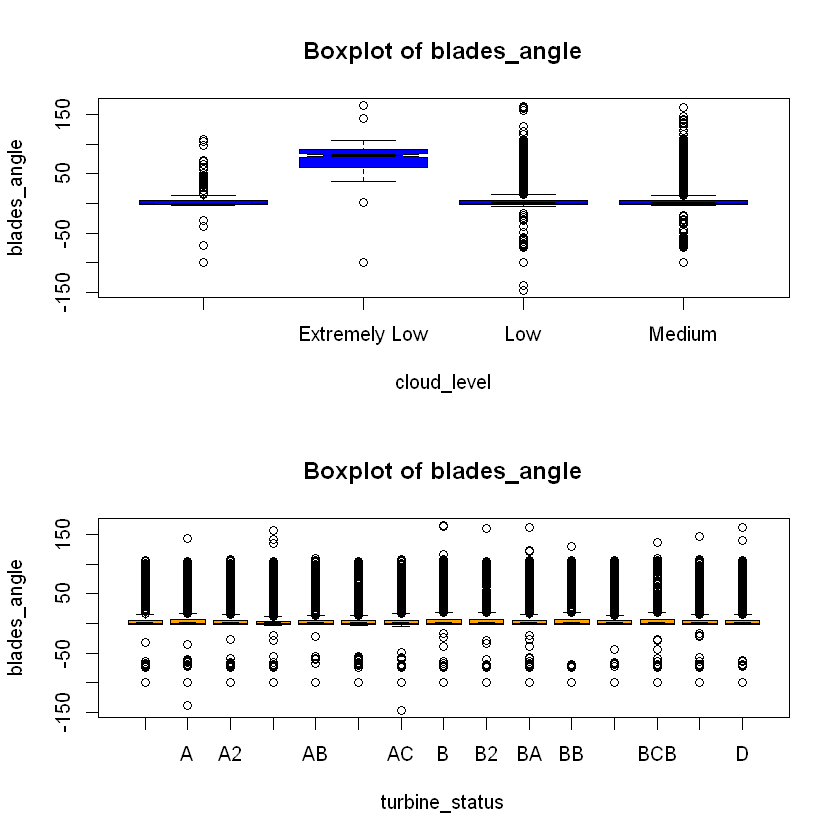

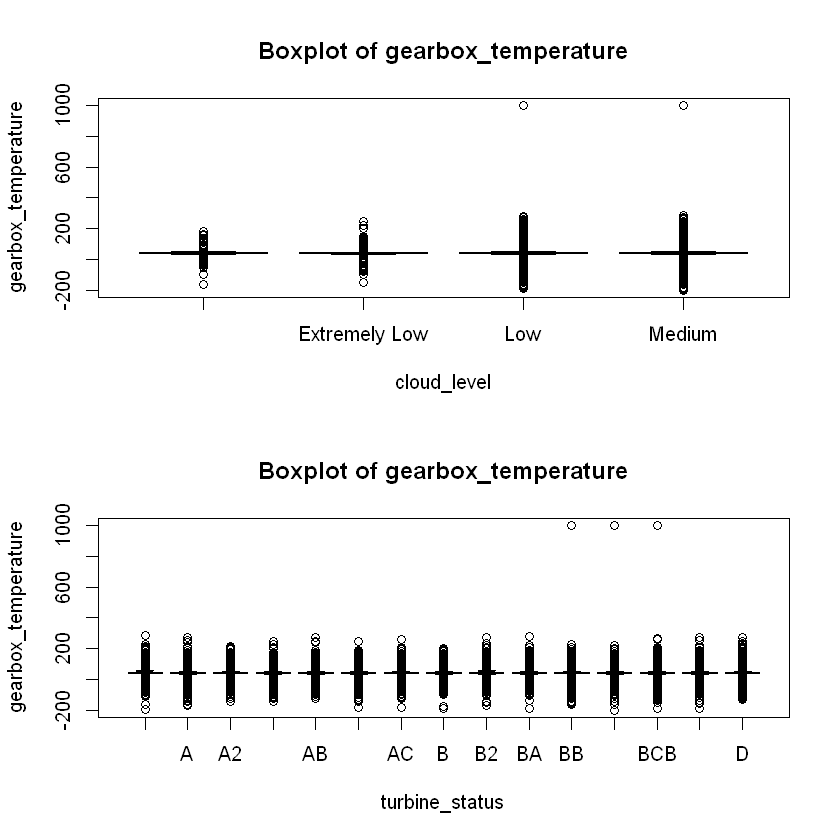

Warning message in bxp(list(stats = structure(c(500, 887.650156293573, 2055.95196405909, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

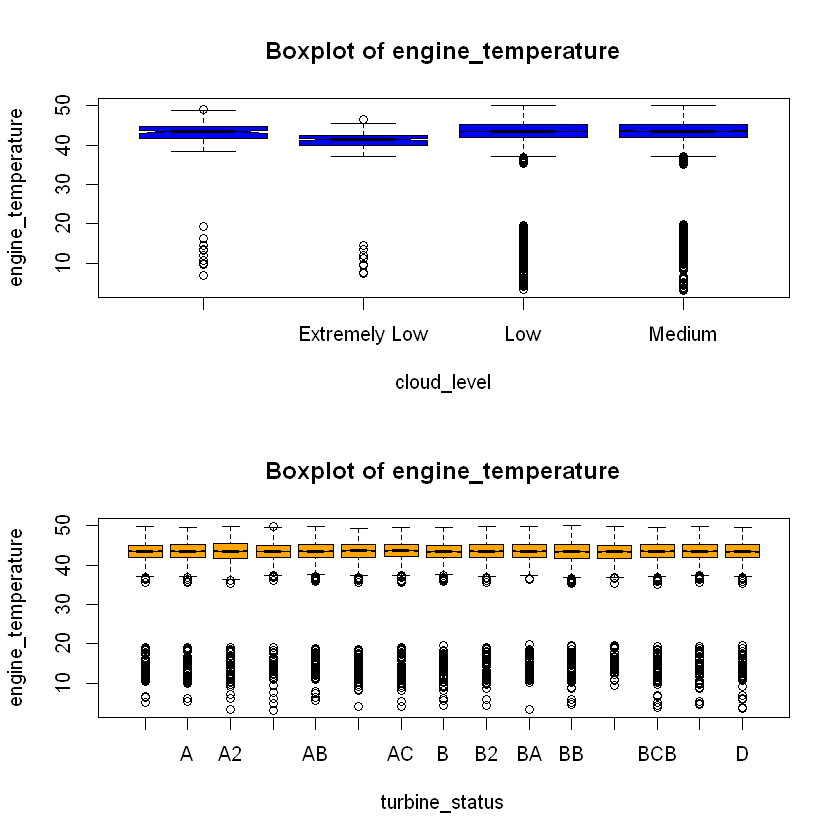

Warning message in bxp(list(stats = structure(c(34.1242713776421, 41.7084878723263, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

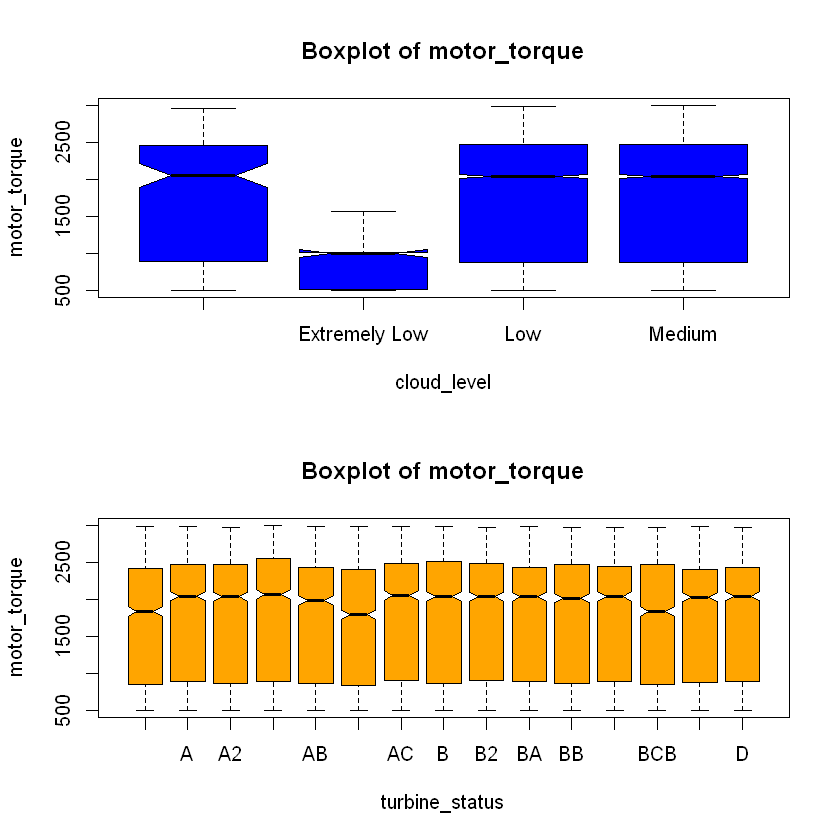

Warning message in bxp(list(stats = structure(c(-97967.1831200864, 16699.6066632798, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"Warning message in bxp(list(stats = structure(c(-136390.207459243, 16846.7856328468, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

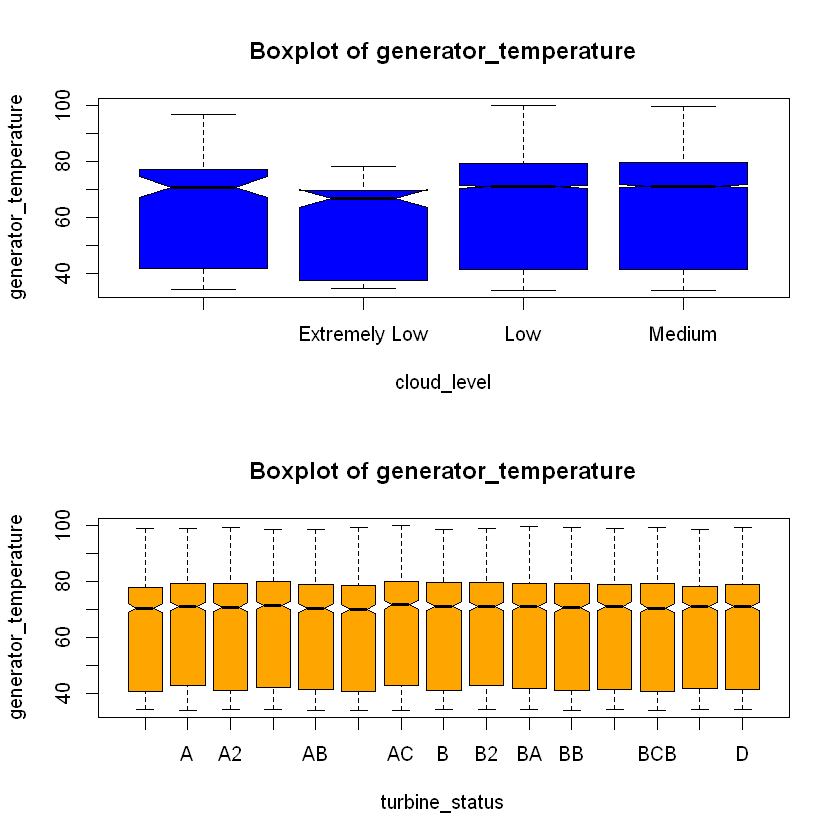

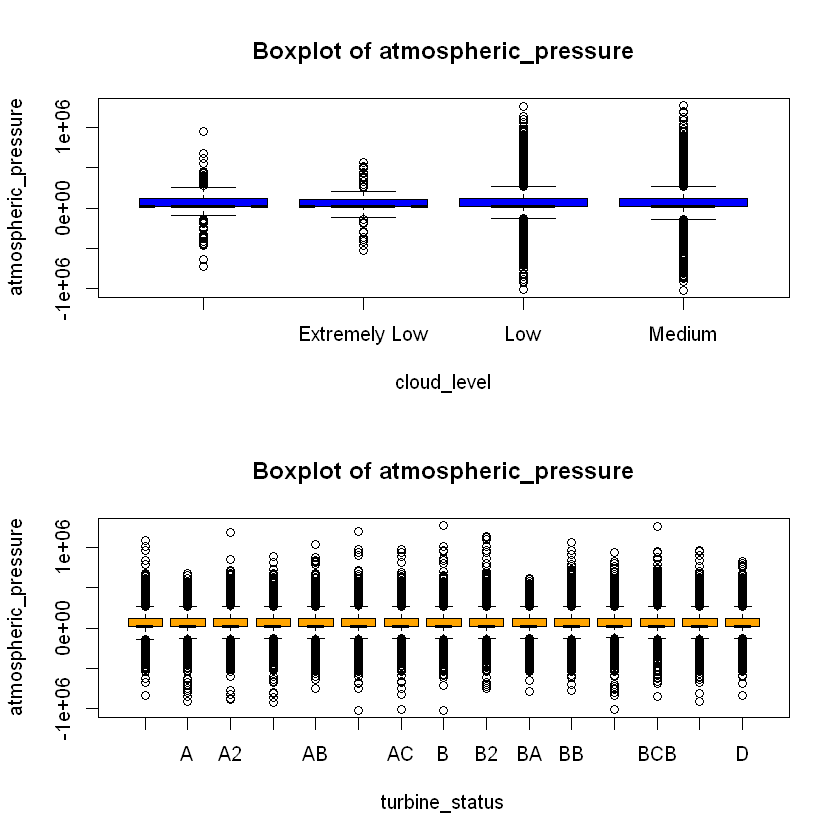

Warning message in bxp(list(stats = structure(c(-32.9567673664373, 12.7786067359187, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

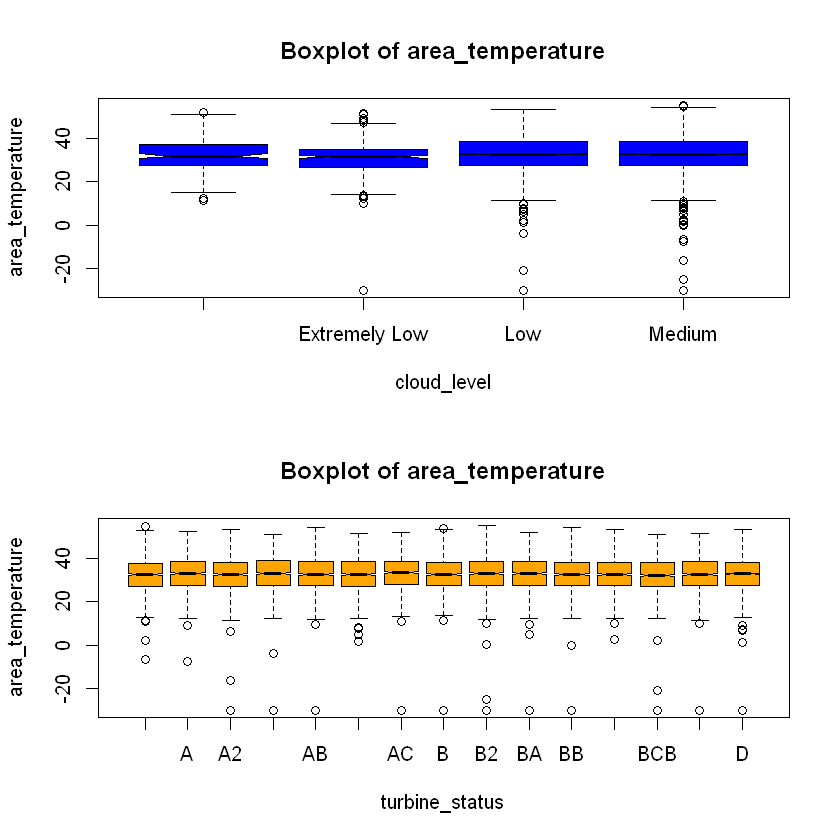

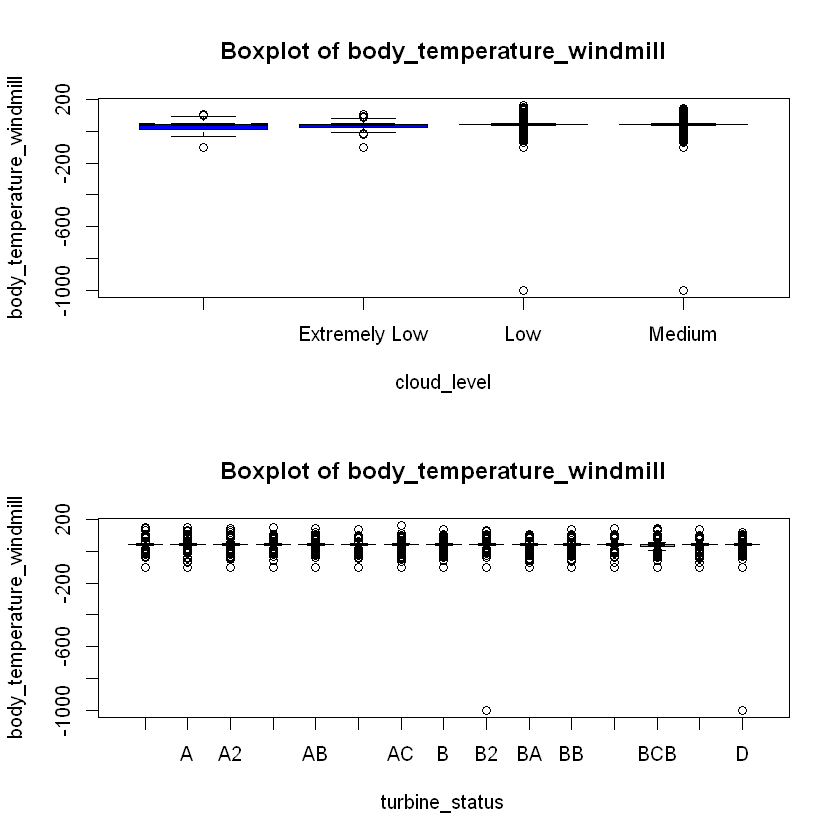

Warning message in bxp(list(stats = structure(c(563.197913842015, 1264.99495294873, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

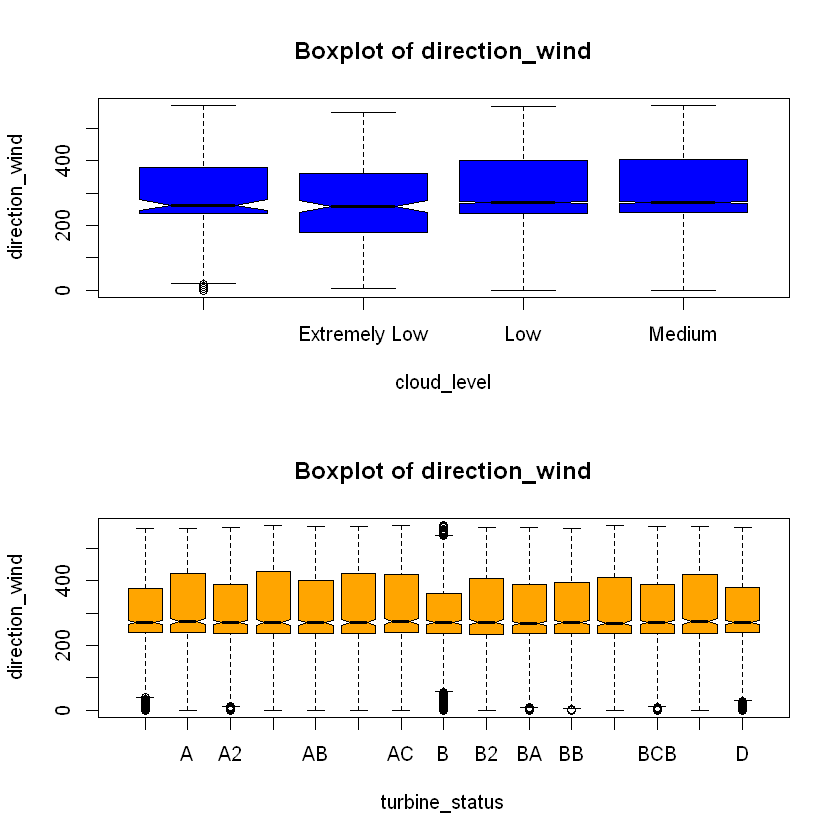

Warning message in bxp(list(stats = structure(c(-24.944765103462, 13.6747973787531, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

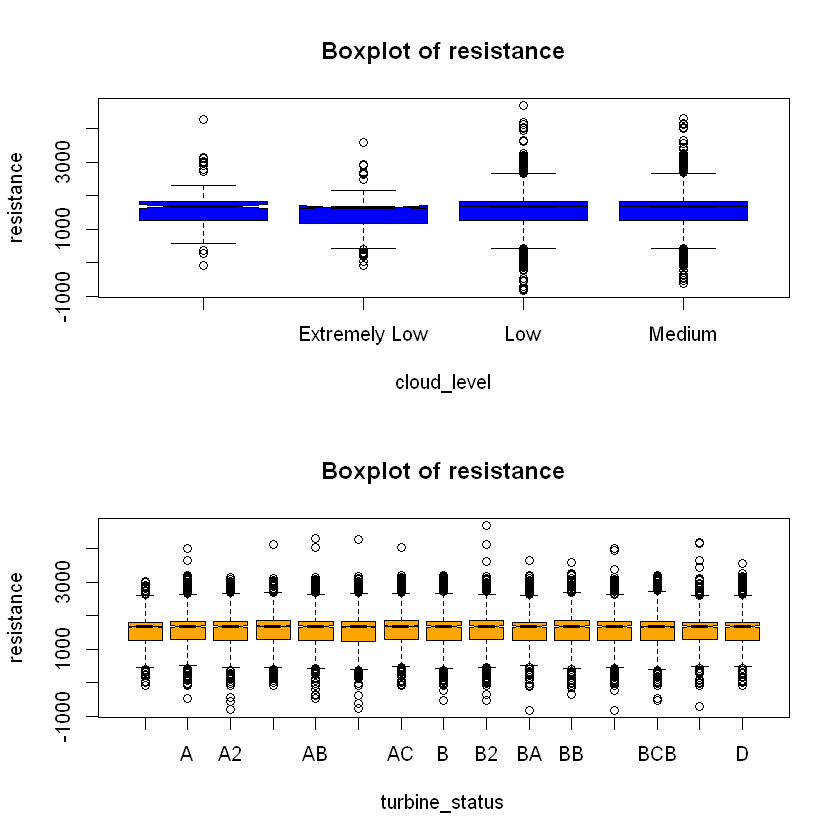

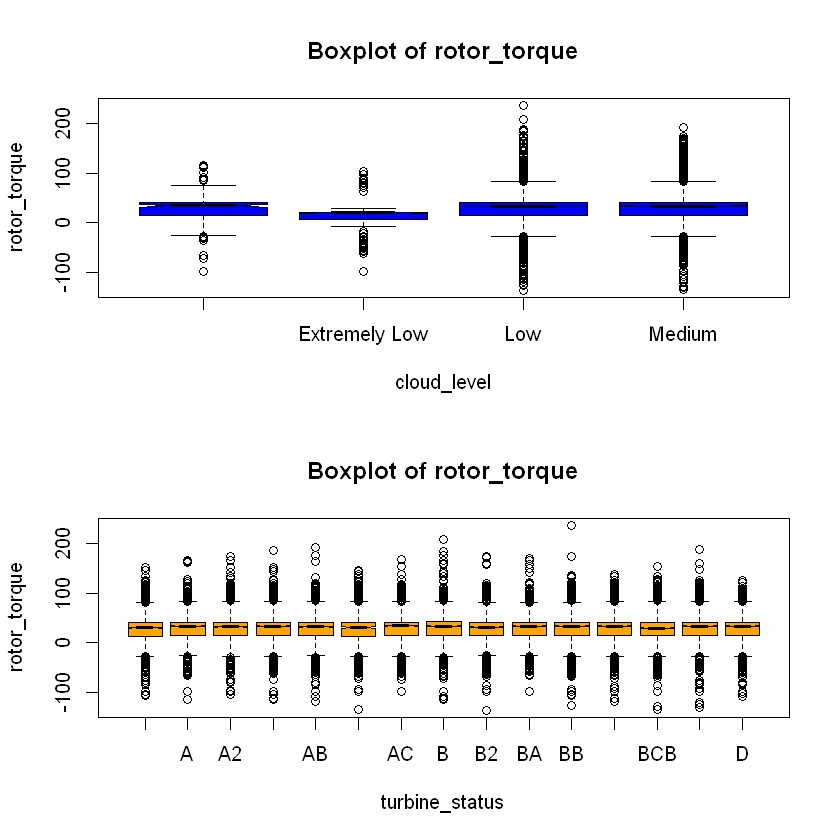

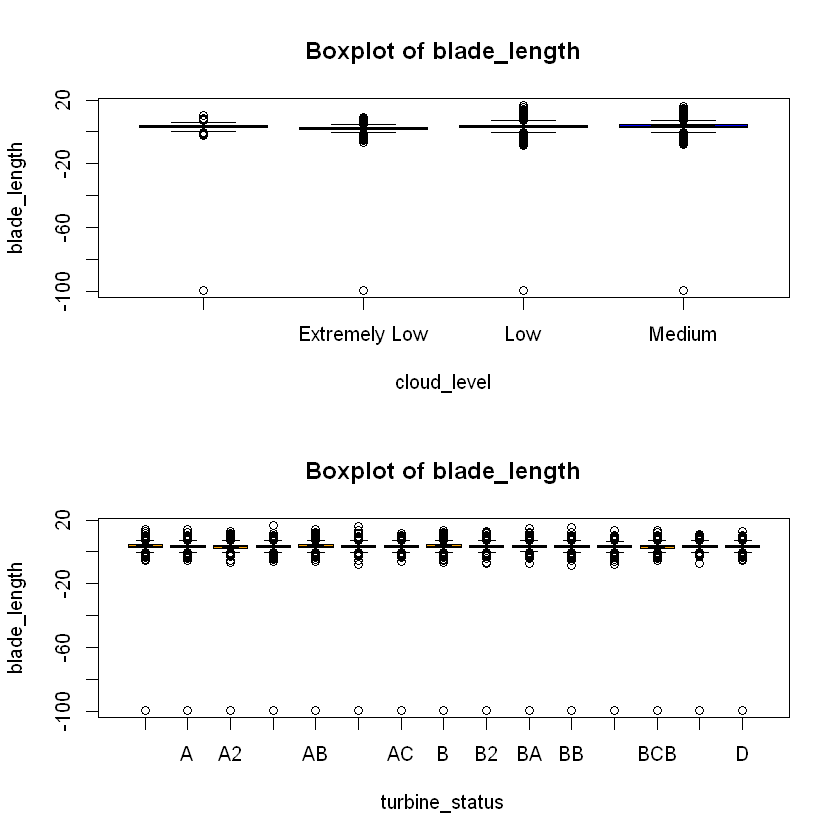

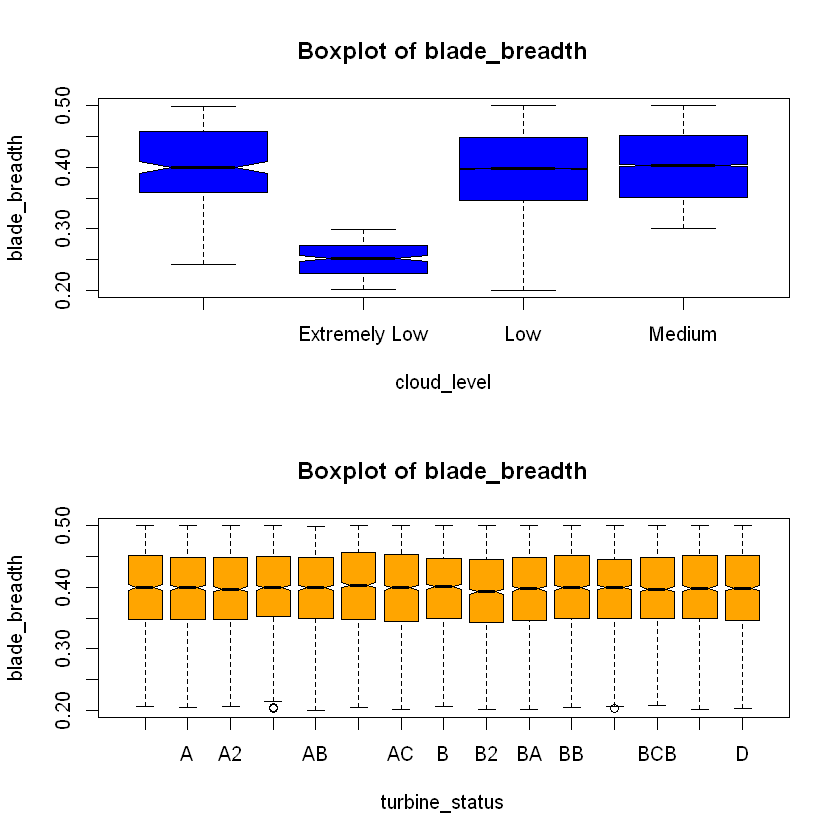

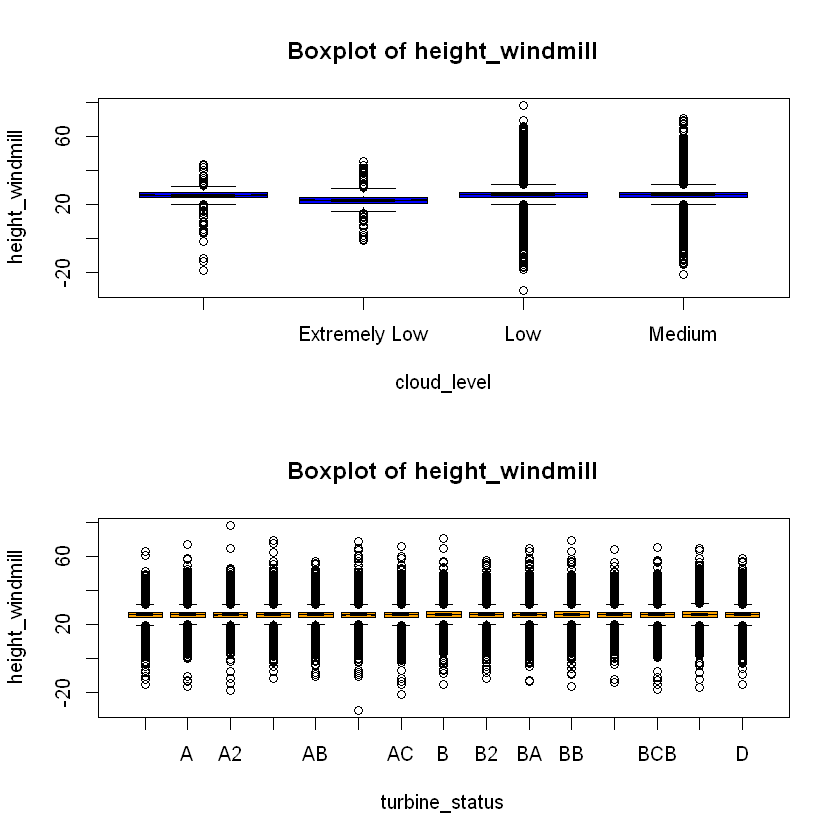

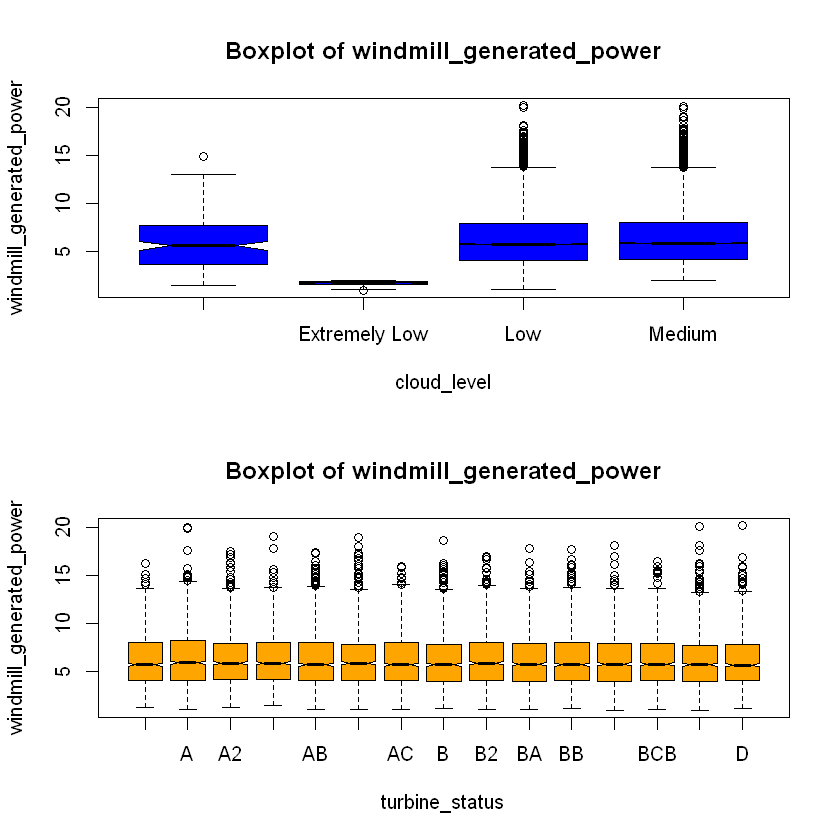

In [29]:
for (i in names(df_train[,c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22)])) 
  {
   par(mfrow = c(2, 1))
   boxplot(df_train[,i] ~ df_train$cloud_level,
        ylab = i,  xlab = "cloud_level", horizontal = F, notch = T,
        main = paste("Boxplot of", i, sep =" "),
        col = "blue",
        border = "black")
    
    boxplot(df_train[,i]~ df_train$turbine_status,
        ylab = i,  xlab = "turbine_status", horizontal = F, notch = T,
        main = paste("Boxplot of", i, sep =" "),
        col = "orange",
        border = "black")
  }

Few observations from Side by side boxplots:
- Median of motor_torque is comparatively less when cloud_level is Extremely Low. 
- Median of windmill_generated_power is comparatively less when cloud_level is Extremely Low.
- Median of blade_bredth is comparatively less when cloud_level is Extremely Low, but this logically is not very useful information as cloud level cannot change the blade_bredth.
- Median of blade_angle is comparatively high when cloud_level is Extremely Low, but this logically is not very useful information as cloud level cannot change the blade_angle.
- The difference in distribution for extremely low cloud level can be due to very few number of observations available for extremely low cloud level.
- We will be removing turbine status column from our training data as we could not find any description with regards to its different values and also it has no effect on the of windmill power generated as seen in the side by side box plots.

In [30]:
nrow(df_train[df_train$atmospheric_temperature == -99.00,]) - nrow(df_train[is.na(df_train$atmospheric_temperature),])
nrow(df_train[is.na(df_train$atmospheric_temperature),])

[1] 3194

[1] 2712

In [31]:
#replacing the null values with -99
df_train$atmospheric_temperature[is.na(df_train$atmospheric_temperature)] = -99.00
sum(is.na(df_train$atmospheric_temperature))

[1] 0

In [32]:
df_train_1 = subset(df_train, atmospheric_temperature > -99) #null values -99 removed
cor(df_train_1$atmospheric_temperature, df_train_1$area_temperature)
round(cor(df_train_1[,c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22)], use = "complete.obs"),3)

[1] 0.4138002

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000,0.298,0.033,-0.002,0.017,0.148,0.378,0.431,-0.133,0.213,0.026,0.046,0.231,0.153,-0.010,0.008,-0.013,0.065
atmospheric_temperature,0.298,1.000,0.062,0.035,0.036,0.327,0.497,0.615,-0.168,0.437,0.062,0.022,0.303,0.203,-0.007,0.012,-0.012,0.003
shaft_temperature,0.033,0.062,1.000,-0.023,0.040,0.223,0.070,0.072,-0.025,0.078,0.027,0.026,0.036,0.028,0.014,0.005,-0.019,0.041
blades_angle,-0.002,0.035,-0.023,1.000,-0.026,-0.059,-0.152,-0.041,-0.006,-0.069,-0.004,-0.040,-0.035,-0.057,-0.017,-0.071,-0.002,-0.174
gearbox_temperature,0.017,0.036,0.040,-0.026,1.000,0.157,0.056,0.055,-0.007,0.053,0.017,0.027,0.024,0.028,-0.019,0.007,0.021,0.055
engine_temperature,0.148,0.327,0.223,-0.059,0.157,1.000,0.358,0.369,-0.080,0.326,0.096,0.136,0.202,0.149,-0.015,0.023,-0.016,0.244
motor_torque,0.378,0.497,0.070,-0.152,0.056,0.358,1.000,0.927,-0.227,0.472,0.031,0.217,0.489,0.404,-0.001,0.069,-0.002,0.517
generator_temperature,0.431,0.615,0.072,-0.041,0.055,0.369,0.927,1.000,-0.253,0.523,0.038,0.208,0.519,0.383,-0.005,0.029,-0.006,0.384
atmospheric_pressure,-0.133,-0.168,-0.025,-0.006,-0.007,-0.080,-0.227,-0.253,1.000,-0.094,-0.014,-0.020,-0.139,-0.111,0.006,-0.011,0.005,-0.019
area_temperature,0.213,0.437,0.078,-0.069,0.053,0.326,0.472,0.523,-0.094,1.000,0.053,0.195,0.255,0.198,-0.006,0.038,-0.009,0.338


- generator_temperature, area_temperature wil be used in KNN to do missing value imputation of atmospheric_temperature as they have high correlation.

In [33]:
#here we are replacing all the null values in the blade length with -99
df_train$blade_length[is.na(df_train$blade_length)] = -99
nrow(df_train[is.na(df_train$blade_length),])
df_train_2 = subset(df_train, blade_length > 0.75) #null values & -99 removed and length greater 0.75 only kept for finding correlation
round(cor(df_train_2[,c(3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22)], use = "complete.obs"),3)

[1] 0

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000,0.040,0.044,0.003,0.014,0.161,0.375,0.430,-0.130,0.216,0.029,0.045,0.222,0.150,0.019,0.001,-0.015,0.059
atmospheric_temperature,0.040,1.000,0.007,-0.001,-0.008,0.039,0.053,0.070,-0.017,0.057,0.004,0.008,0.016,0.031,0.022,-0.004,0.001,0.008
shaft_temperature,0.044,0.007,1.000,-0.024,0.041,0.221,0.075,0.078,-0.025,0.081,0.029,0.027,0.039,0.031,0.011,0.006,-0.018,0.041
blades_angle,0.003,-0.001,-0.024,1.000,-0.031,-0.068,-0.149,-0.037,-0.001,-0.079,-0.009,-0.034,-0.029,-0.055,-0.043,-0.070,-0.002,-0.170
gearbox_temperature,0.014,-0.008,0.041,-0.031,1.000,0.150,0.048,0.046,-0.007,0.052,0.012,0.024,0.021,0.021,0.017,0.018,0.020,0.061
engine_temperature,0.161,0.039,0.221,-0.068,0.150,1.000,0.359,0.369,-0.071,0.325,0.096,0.136,0.202,0.144,0.010,0.017,-0.018,0.244
motor_torque,0.375,0.053,0.075,-0.149,0.048,0.359,1.000,0.925,-0.215,0.476,0.030,0.214,0.485,0.399,0.034,0.063,-0.017,0.519
generator_temperature,0.430,0.070,0.078,-0.037,0.046,0.369,0.925,1.000,-0.242,0.527,0.038,0.208,0.517,0.377,0.021,0.017,-0.019,0.382
atmospheric_pressure,-0.130,-0.017,-0.025,-0.001,-0.007,-0.071,-0.215,-0.242,1.000,-0.088,-0.009,-0.025,-0.128,-0.101,-0.001,-0.002,0.021,-0.009
area_temperature,0.216,0.057,0.081,-0.079,0.052,0.325,0.476,0.527,-0.088,1.000,0.053,0.193,0.258,0.190,0.019,0.025,-0.014,0.341


- We will impute the varible blade length with median in the df_train in all the values of blade length \< 0.75 or null values. impute the varible body_temperature_windmill with median.

In [34]:
df_train_3 = df_train[!is.na(df_train$atmospheric_pressure),]
head(df_train_3,5)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,body_temperature_windmill,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power
26192,WM_24537,2019-05-25 12:53:20,17.72478,-99.00000,-7.188719,0.1414163,40.25473,42.43052,822.4819,38.47305,...,42.70092,218.2293,1246.371,13.20723,AB,Low,8.300782,0.3814347,26.53865,5.327000
17516,WM_11995,2019-02-02 12:53:20,96.82917,17.55623,43.230546,14.3595777,49.45086,43.94813,2839.8185,92.68765,...,46.51208,313.8371,1953.055,47.48195,BB,Medium,3.935231,0.4718723,24.94531,13.769339
24567,WM_23214,2019-05-16 03:43:20,-136.21533,12.22514,41.908392,-99.0000000,41.28349,42.78060,783.3366,38.38925,...,42.15207,211.4183,1213.762,75.87272,BA,Medium,3.634979,0.4235379,27.17957,4.653317
4803,WM_2835,2018-11-24 16:33:20,96.77077,29.38938,46.760040,-1.3033806,-23.07728,45.44861,2462.8923,75.78548,...,46.44784,281.9405,1793.424,39.87404,A,Low,-99.000000,0.4724430,24.51290,6.242050
26949,WM_38441,2019-09-09 04:13:20,19.90549,11.66558,45.029645,-146.2595427,43.09589,42.98405,820.0955,40.22810,...,41.74974,265.4704,1249.299,13.93055,AC,Low,3.113394,0.4779521,30.70911,5.640274


In [35]:
summary(df_train_3$atmospheric_pressure)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1021642    16793    18208    53480   118112  1272552 

- As seen in the above summary, atmospheric pressure is ranging from -1021642 to 1272552, which is an impractical range for pressure as it cannot be negative and also atmospheric temperature at sea level is 101000 pascals. So we will rescale the entire pressure range from an impractical range of (-1021642, 1272552) to a practical range of (90000, 101000), without changing the distribution of atmospheric pressure. We will impute the missing values using mean of the distribution.

In [36]:
df_train_4 = df_train[!is.na(df_train$direction_wind),]
sum(is.na(df_train_4$direction_wind))
summary(df_train_4$direction_wind)

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   238.0   271.1   306.0   398.7   570.0 

- Wind direction of 570 degress doesn’t make any sense hence we will convert all values from 0 to 360 by taking remainder as new value after dividing each element by 360.

In [37]:
summary(df_train$rotor_torque, breaks = 25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-136.73   13.77   33.09   25.86   41.60  236.88     454 

- Negative values of rotor torque doesn’t make any sense as our generated power is positive throughout so updating it with the absolute values of rotor torque.

In [38]:
df_train$rotor_torque = abs(df_train$rotor_torque)
summary(df_train$rotor_torque, breaks = 25)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  0.0222  16.3133  34.8880  34.5145  43.0337 236.8833      454 

## Imputations:

In [39]:
#imputation of the 8 missing values in the engine temp with median values
df_train$engine_temperature[is.na(df_train$engine_temperature)] = median(df_train$engine_temperature, na.rm = T)
summary(df_train$engine_temperature)

#imputation of the missig values in the engine temp with median values for test data
df_test$engine_temperature[is.na(df_test$engine_temperature)] = median(df_train$engine_temperature, na.rm = T)
summary(df_test$engine_temperature)

sum(is.na(df_train$engine_temperature))
sum(is.na(df_test$engine_temperature))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.167  41.912  43.519  42.598  45.178  50.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.568  41.913  43.543  42.660  45.143  49.827 

[1] 0

[1] 0

In [40]:
#impute the variable blade length with median in the df_train in all the values < 0.75 and null values.
summary(df_train$blade_length)
df_train$blade_length[is.na(df_train$blade_length)] = -99
df_train$blade_length[df_train$blade_length < 0.75] = median(df_train_2$blade_length, na.rm = T) #replacing by median of df_train_2 as it contains values above 0.75
summary(df_train$blade_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-99.000   1.467   3.048 -15.907   4.151  16.393 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7508  3.0049  3.5882  3.7292  4.1508 16.3928 

In [41]:
#for test
sum(is.na(df_test$blade_length))
df_test$blade_length[is.na(df_test$blade_length)] = -99
df_test$blade_length[df_test$blade_length < 0.75] = median(df_train_2$blade_length, na.rm = T)
summary(df_test$blade_length)

[1] 1036

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7735  3.0498  3.5882  3.7624  4.1811 18.2098 

In [42]:
# imputing the generator_temperature

summary(df_train$generator_temperature)
df_train$generator_temperature[is.na(df_train$generator_temperature)] = mean(df_train$generator_temperature, na.rm = T)
summary(df_train$generator_temperature)

summary(df_test$generator_temperature)
df_test$generator_temperature[is.na(df_test$generator_temperature)] = mean(df_train$generator_temperature, na.rm = T)
summary(df_test$generator_temperature)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  33.89   41.26   70.78   65.13   79.00   99.73       9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.89   41.26   70.77   65.13   79.00   99.73 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34.02   41.03   70.49   64.55   78.63  100.00       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.02   41.03   70.49   64.55   78.62  100.00 

In [43]:
#imputation for motor_torque   
summary(df_train$motor_torque)
df_train$motor_torque[is.na(df_train$motor_torque)] = median(df_train$motor_torque, na.rm = T)
summary(df_train$motor_torque)

summary(df_test$motor_torque)
df_test$motor_torque[is.na(df_test$motor_torque)] = median(df_train$motor_torque, na.rm = T)
summary(df_test$motor_torque)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  500.0   872.5  2033.3  1713.5  2464.4  3000.0      20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  500.0   872.8  2033.3  1713.8  2464.0  3000.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  500.0   863.6  2026.4  1698.2  2441.4  2987.7       4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  500.0   863.9  2026.4  1698.5  2441.1  2987.7 

In [44]:
#imputation for rotor_torque 
summary(df_train$rotor_torque)
df_train$rotor_torque[is.na(df_train$rotor_torque)] = median(df_train$rotor_torque, na.rm = T)
summary(df_train$rotor_torque)

summary(df_test$rotor_torque)
df_test$rotor_torque[is.na(df_test$rotor_torque)] = median(df_train$rotor_torque, na.rm = T)
summary(df_test$rotor_torque)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  0.0222  16.3133  34.8880  34.5145  43.0337 236.8833      454 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.02223  16.49154  34.88799  34.52204  42.87457 236.88326 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-120.91   13.54   32.44   25.81   41.29  170.71     113 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-120.91   13.65   33.17   25.99   41.03  170.71 

In [45]:
###imputation for shaft_temperature

nrow(df_train[(df_train$shaft_temperature < -80), ])
summary(df_train$shaft_temperature)
df_train$shaft_temperature[is.na(df_train$shaft_temperature)]  = median(df_train$shaft_temperature,na.rm = T)
df_train$shaft_temperature[df_train$shaft_temperature < -80]  = median(df_train$shaft_temperature,na.rm = T)
summary(df_train$shaft_temperature)

summary(df_test$shaft_temperature)
df_test$shaft_temperature[is.na(df_test$shaft_temperature)]  = median(df_train$shaft_temperature,na.rm = T)
df_test$shaft_temperature[df_test$shaft_temperature < -80]  = median(df_train$shaft_temperature,na.rm = T)
summary(df_test$shaft_temperature)

[1] 432

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -99.00   41.65   43.68   40.21   45.69  169.82       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -75.87   41.84   43.68   42.96   45.69  169.82 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -99.00   41.60   43.69   39.56   45.60  149.69       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -76.27   41.86   43.69   42.69   45.60  149.69 

In [46]:
#imputation for direction_wind
df_train$direction_wind = (df_train$direction_wind)%%360
df_test$direction_wind = (df_test$direction_wind)%%360

summary(df_train$direction_wind)
df_train$direction_wind[is.na(df_train$direction_wind)]  = median(df_train$direction_wind,na.rm = T)
summary(df_train$direction_wind)

summary(df_test$direction_wind)
df_test$direction_wind[is.na(df_test$direction_wind)]  = median(df_train$direction_wind,na.rm = T)
summary(df_test$direction_wind)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   153.4   234.3   208.3   268.5   360.0    4023 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   169.0   234.3   212.9   261.4   360.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   155.3   236.4   209.5   268.4   359.9    1035 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   171.3   234.3   214.1   261.7   359.9 

In [47]:
#imputation for height_windmill
nrow(df_train[(df_train$height_windmill < 0),])
summary(df_train$height_windmill)
df_train$height_windmill[is.na(df_train$height_windmill)] = 500
df_train$height_windmill[(df_train$height_windmill < 0)] = df_train$height_windmill[(df_train$height_windmill < 0)] * -1
df_train$height_windmill[(df_train$height_windmill == 500)] = median(df_train$height_windmill,na.rm = T)
summary(df_train$height_windmill)

summary(df_test$height_windmill)
df_test$height_windmill[is.na(df_test$height_windmill)] = 500
df_test$height_windmill[(df_test$height_windmill < 0)] = df_test$height_windmill[(df_test$height_windmill < 0)] * -1
df_test$height_windmill[(df_test$height_windmill == 500)] = median(df_train$height_windmill,na.rm = T)
summary(df_test$height_windmill)

[1] 558

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -30.30   24.46   25.97   25.95   27.49   78.35     441 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.02649 24.48284 26.02998 26.02000 27.45837 78.35134 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -19.33   24.39   25.89   25.63   27.43   60.46      97 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.04542 24.41989 25.94306 25.72535 27.41150 60.45584 

In [48]:
#imputation for blades_angle 
summary(df_train$blades_angle)
df_train$blades_angle[is.na(df_train$blades_angle)]  = median(df_train$blades_angle,na.rm = T)
summary(df_train$blades_angle)

summary(df_test$blades_angle)
df_test$blades_angle[is.na(df_test$blades_angle)]  = median(df_train$blades_angle,na.rm = T)
summary(df_test$blades_angle)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
-146.2595   -1.1974   -0.4883   -9.5606    5.6891  165.1694       173 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-146.2595   -1.1942   -0.4883   -9.4905    5.5570  165.1694 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-99.0000  -1.1982  -0.5306 -10.0404   4.7045 165.9321       39 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-99.0000  -1.1948  -0.4995  -9.9739   4.5870 165.9321 

In [49]:
#imputation for resistance with median and converting negative values to positive
summary(df_train$resistance)
df_train$resistance[df_train$resistance ==-99] = NA
df_train$resistance[is.na(df_train$resistance)] = 111111
df_train$resistance[df_train$resistance < 0] = df_train$resistance[df_train$resistance < 0] * -1
df_train$resistance[df_train$resistance == 111111] = NA
df_train$resistance[is.na(df_train$resistance)] = median(df_train$resistance,na.rm = T)
summary(df_train$resistance)

summary(df_test$resistance)
df_test$resistance[df_test$resistance ==-99] = NA
df_test$resistance[is.na(df_test$resistance)] = 111111
df_test$resistance[df_test$resistance < 0] = df_test$resistance[df_test$resistance < 0] * -1
df_test$resistance[df_test$resistance == 111111] = NA
df_test$resistance[is.na(df_test$resistance)] = median(df_train$resistance,na.rm = T)
summary(df_test$resistance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -825.2  1267.2  1677.8  1573.4  1826.8  4693.5       1 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.451 1291.019 1682.554 1610.690 1826.815 4693.482 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1005    1270    1680    1584    1834    4389 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   4.148 1290.729 1682.554 1616.003 1833.580 4389.365 

In [50]:
#imputation for gearbox_temperature.
length(df_train$gearbox_temperature[df_train$gearbox_temperature <= -30]) - sum(is.na(df_train$gearbox_temperature))
length(df_train$gearbox_temperature[df_train$gearbox_temperature >= 120]) - sum(is.na(df_train$gearbox_temperature))
summary(df_train$gearbox_temperature)
df_train$gearbox_temperature[(df_train$gearbox_temperature <=-99) | (df_train$gearbox_temperature >=120) ] = NA
df_train$gearbox_temperature[is.na(df_train$gearbox_temperature)] = 111111
df_train$gearbox_temperature[df_train$gearbox_temperature < 0]= df_train$gearbox_temperature[df_train$gearbox_temperature < 0] * -1
df_train$gearbox_temperature[df_train$gearbox_temperature == 111111] = NA
df_train$gearbox_temperature[is.na(df_train$gearbox_temperature)] = median(df_train$gearbox_temperature,na.rm = T)
summary(df_train$gearbox_temperature)

summary(df_test$gearbox_temperature)
df_test$gearbox_temperature[(df_test$gearbox_temperature <=-99) | (df_test$gearbox_temperature >=120) ] = NA
df_test$gearbox_temperature[is.na(df_test$gearbox_temperature)] = 111111
df_test$gearbox_temperature[df_test$gearbox_temperature < 0] = df_test$gearbox_temperature[df_test$gearbox_temperature < 0] * -1
df_test$gearbox_temperature[df_test$gearbox_temperature == 111111] = NA
df_test$gearbox_temperature[is.na(df_test$gearbox_temperature)] = median(df_train$gearbox_temperature,na.rm = T)
summary(df_test$gearbox_temperature)

[1] 1430

[1] 1098

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-201.17   40.55   43.23   41.12   45.91  999.00 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00185  41.25807  43.41032  44.72424  45.63986 119.93030 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-244.97   40.63   43.17   40.53   45.75  348.69       1 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.05664  41.22193  43.41032  44.70034  45.63005 119.94582 

In [51]:
#imputation for body_temperature_windmill
summary(df_train$body_temperature_windmill)
df_train$body_temperature_windmill[df_train$body_temperature_windmill <= -99] = NA
df_train$body_temperature_windmill[is.na(df_train$body_temperature_windmill)]= median(df_train$body_temperature_windmill,na.rm = T)
summary(df_train$body_temperature_windmill)

summary(df_test$body_temperature_windmill)
df_test$body_temperature_windmill[df_test$body_temperature_windmill <= -99] = NA
df_test$body_temperature_windmill[is.na(df_test$body_temperature_windmill)]  = median(df_train$body_temperature_windmill,na.rm = T)
summary(df_test$body_temperature_windmill)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-999.00   40.44   42.78   20.72   44.50  160.29    1893 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -72.27   42.29   43.28   42.55   44.33  160.29 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -99.00   40.41   42.81   20.94   44.47  323.00     459 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -67.84   42.31   43.28   42.82   44.30  323.00 

In [52]:
#imputation for body_temperature_windmill
summary(df_train$speed_wind)
length(df_train$speed_wind[df_train$speed_wind == -99 ]) - sum(is.na(df_train$speed_wind))
df_train$speed_wind[is.na(df_train$speed_wind)] = 111111
df_train$speed_wind[df_train$speed_wind < 0] = df_train$speed_wind[df_train$speed_wind < 0] * -1
df_train$speed_wind[df_train$speed_wind == 111111] = NA
df_train$speed_wind[is.na(df_train$speed_wind)] = median(df_train$speed_wind,na.rm = T)
df_train$speed_wind = df_train$speed_wind/10
summary(df_train$speed_wind)

summary(df_test$speed_wind)
df_test$speed_wind[is.na(df_test$speed_wind)] = 111111
df_test$speed_wind[df_test$speed_wind < 0] = df_test$speed_wind[df_test$speed_wind < 0] * -1
df_test$speed_wind[df_test$speed_wind == 111111] = NA
df_test$speed_wind[is.na(df_test$speed_wind)] = median(df_train$speed_wind,na.rm = T)
df_test$speed_wind = df_test$speed_wind/10
summary(df_test$speed_wind)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-496.21   21.13   93.31   69.36   95.29  601.46     209 

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1768  3.5124  9.3632  8.4153  9.5604 60.1456 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-318.08   20.07   93.26   67.73   95.18  513.08      62 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3555  3.0331  9.3536  8.2208  9.5498 51.3079 

In [56]:
#install.packages("VIM")
library(VIM)

In [ ]:
#   generator_temperature, area_temperature will be used in KNN to do missing value  imputation of atmospheric_temperature as they have high correlation.
summary(df_train$atmospheric_temperature)
nrow(df_train[(df_train$atmospheric_temperature == -99), ])
df_train$atmospheric_temperature[(df_train$atmospheric_temperature == -99)] = NA
df_train = kNN(df_train, variable = "atmospheric_temperature", k = 1, dist_var = c("generator_temperature", "area_temperature") )
summary(df_train$atmospheric_temperature)

summary(df_test$atmospheric_temperature)
df_test$atmospheric_temperature[(df_test$atmospheric_temperature == -99)] = NA
df_test = kNN(df_test, variable = "atmospheric_temperature", k = 1, dist_var = c("generator_temperature", "area_temperature") )
summary(df_test$atmospheric_temperature)

In [ ]:
# imputation for cloud_level
summary(as.factor(df_train$cloud_level))
df_train$cloud_level[df_train$cloud_level ==''] = 'Low'
summary(as.factor(df_train$cloud_level))

summary(df_test$cloud_level)
df_test$cloud_level[df_test$cloud_level ==''] = 'Low'
summary(df_test$cloud_level)

- Atmospheric pressure is ranging from -1021642 to 1272552, which is an impractical range for pressure as it cannot be negative and also atmospheric temperature at sea level is 101000 pascals. So we will rescale the entire pressure range from an impractical range of (-1021642, 1272552) to a practical range of (90000, 101000), without changing the distribution of atmospheric pressure. We will impute the missing values using mean of the distribution.

In [ ]:
#imputation for atmospheric_pressure 
summary(df_train$atmospheric_pressure)
summary(df_test$atmospheric_pressure)
df_train$atmospheric_pressure [is.na(df_train$atmospheric_pressure )] = mean(df_train$atmospheric_pressure ,na.rm = T)
df_test$atmospheric_pressure [is.na(df_test$atmospheric_pressure )] = mean(df_train$atmospheric_pressure ,na.rm = T)

mu = mean(df_train$atmospheric_pressure)  #mean of atmospheric_pressure
sigma = sd(df_train$atmospheric_pressure)  # standard deviation of atmospheric_pressure
n = length(df_train$atmospheric_pressure)  # length of atmospheric_pressure
z = (df_train$atmospheric_pressure - mu)/(sigma/n**0.5) #converting to z-distribution having 0 mean and 1 standard deviation
z1 = (df_test$atmospheric_pressure - mu)/(sigma/n**0.5) #converting to z-distribution having 0 mean and 1 standard deviation

Zmin = min(z) #minimum value of z distribution
Zmax = max(z) ##maximum value of z distribution
e_11 = 1
e_12 = 1
e_21 = Zmin/n**0.5
e_22 = Zmax/n**0.5

#90000 = (zmin-mu)/(sigma/n**0.5)
#101000 = (zmax-mu)/(sigma/n**0.5)
#solving two linear equations to find out the values of mu and sigma for which above distribution will be followed and min = 90000 and max=101000.

A = matrix(c(e_11,e_12,e_21,e_22),2,2)
b = c(90000,101000)
a = solve(A, b, fractions = TRUE) #solving two linear equations
mu_ = a[1]    #answer from solving two linear equations
sigma_ = a[2] ##answer from solving two linear equations

df_train$atmospheric_pressure = mu_ + z*sigma_/n**0.5 #train distribution with minimum value as 90000 and maximum value as 101000
df_test$atmospheric_pressure = mu_ + z1*sigma_/n**0.5 
summary(df_train$atmospheric_pressure)
summary(df_test$atmospheric_pressure)

In [ ]:
write.csv(df_train,'Windmill_train_clean.csv',row.names = F) #Writing the cleaned train csv file to local system
write.csv(df_test,'Windmill_test_clean.csv',row.names = F)   #Writing the cleaned test csv file to local system